<a href="https://colab.research.google.com/github/aditi-DS-Masters/Precision-Property-Insights/blob/main/PrecisionPropertyInsights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Data Decoding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
property_selling_date = "20150427T000000"

In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Precision Property Insights.xlsx")

In [ ]:
df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [ ]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [ ]:
## deleting cid && total area
## cid --> id
## total area --> dependent variable (lot area + living area)

## target varible --> price
df.drop(["cid", "total_area"], axis=1, inplace=True)
df.columns


Index(['dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayhours          21613 non-null  object 
 1   price             21613 non-null  int64  
 2   room_bed          21505 non-null  float64
 3   room_bath         21505 non-null  float64
 4   living_measure    21596 non-null  float64
 5   lot_measure       21571 non-null  float64
 6   ceil              21571 non-null  object 
 7   coast             21612 non-null  object 
 8   sight             21556 non-null  float64
 9   condition         21556 non-null  object 
 10  quality           21612 non-null  float64
 11  ceil_measure      21612 non-null  float64
 12  basement          21612 non-null  float64
 13  yr_built          21612 non-null  object 
 14  yr_renovated      21613 non-null  int64  
 15  zipcode           21613 non-null  int64  
 16  lat               21613 non-null  float6

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
dtype: int64


In [ ]:
total_number_of_records = df.shape[0]
total_number_of_records

21613

In [ ]:
df_without_nulls = df.dropna()
total_number_of_records_without_nulls = df_without_nulls.shape[0]
print(total_number_of_records_without_nulls)

21387


In [ ]:
percentage_loss = ((total_number_of_records-total_number_of_records_without_nulls)/total_number_of_records)
print(f"{percentage_loss:.2%}")

1.05%


In [ ]:
## My percentage data loss is only 1.05% hence i can safely remove the null values instead of imputing

In [ ]:
df_without_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21387 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayhours          21387 non-null  object 
 1   price             21387 non-null  int64  
 2   room_bed          21387 non-null  float64
 3   room_bath         21387 non-null  float64
 4   living_measure    21387 non-null  float64
 5   lot_measure       21387 non-null  float64
 6   ceil              21387 non-null  object 
 7   coast             21387 non-null  object 
 8   sight             21387 non-null  float64
 9   condition         21387 non-null  object 
 10  quality           21387 non-null  float64
 11  ceil_measure      21387 non-null  float64
 12  basement          21387 non-null  float64
 13  yr_built          21387 non-null  object 
 14  yr_renovated      21387 non-null  int64  
 15  zipcode           21387 non-null  int64  
 16  lat               21387 non-null  float64
 17

In [ ]:
def percentage_data_loss(df: pd.DataFrame):
  df_without_nulls = df.dropna()
  total_number_of_records_without_nulls = df_without_nulls.shape[0]
  percentage_loss = ((total_number_of_records-total_number_of_records_without_nulls)/total_number_of_records)
  print(f"{percentage_loss:.2%}")

# Feature Engineering Part 1

### Conversion of object datatype to numerical

---



In [ ]:
df.dropna(inplace=True)
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['dayhours', 'ceil', 'coast', 'condition', 'yr_built', 'long'], dtype='object')


In [ ]:
df.dayhours

0        20150427T000000
1        20150317T000000
2        20140820T000000
3        20141010T000000
4        20150218T000000
              ...       
21608    20150310T000000
21609    20140521T000000
21610    20140905T000000
21611    20150206T000000
21612    20141229T000000
Name: dayhours, Length: 21387, dtype: object

In [ ]:
# Convert 'dayhours' to datetime format (ignoring the 'T000000' part)
df['dayhours'] = pd.to_datetime(df['dayhours'].str[:8], format='%Y%m%d')

# Extract Year, Month, and Weekday
df['year'] = df['dayhours'].dt.year
df['month'] = df['dayhours'].dt.month
df['weekday'] = df['dayhours'].dt.day_name()  # Gives full weekday name (e.g., Monday)
x
df


dayhours    price  room_bed  room_bath  living_measure  lot_measure  \
0     2015-04-27   600000       4.0       1.75          3050.0       9440.0   
1     2015-03-17   190000       2.0       1.00           670.0       3101.0   
2     2014-08-20   735000       4.0       2.75          3040.0       2415.0   
3     2014-10-10   257000       3.0       2.50          1740.0       3721.0   
4     2015-02-18   450000       2.0       1.00          1120.0       4590.0   
...          ...      ...       ...        ...             ...          ...   
21608 2015-03-10   685530       4.0       2.50          3130.0      60467.0   
21609 2014-05-21   535000       2.0       1.00          1030.0       4841.0   
21610 2014-09-05   998000       3.0       3.75          3710.0      34412.0   
21611 2015-02-06   262000       4.0       2.50          1560.0       7800.0   
21612 2014-12-29  1150000       4.0       2.50          1940.0       4875.0   

      ceil coast  sight condition  ...  yr_renovated  zipcode      lat  \
0        1     0    0.0         3  ...             0    98034  47.7228   
1        1     0    0.0         4  ...             0    98118  47.5546   
2        2     1    4.0         3  ...             0    98118  47.5188   
3        2     0    0.0         3  ...             0    98002  47.3363   
4        1     0    0.0         3  ...             0    98118  47.5663   
...    ...   ...    ...       ...  ...           ...      ...      ...   
21608    2     0    0.0         3  ...             0    98014  47.6618   
21609    1     0    0.0         3  ...             0    98103  47.6860   
21610    2     0    0.0         3  ...             0    98075  47.5888   
21611    2     0    0.0         3  ...             0    98168  47.5140   
21612    2     0    0.0         4  ...             0    98112  47.6427   

          long  living_measure15  lot_measure15  furnished  year  month  \
0     -122.183            2020.0         8660.0        0.0  2015      4   
1     -122.274            1660.0         4100.0        0.0  2015      3   
2     -122.256            2620.0         2433.0        0.0  2014      8   
3     -122.213            2030.0         3794.0        0.0  2014     10   
4     -122.285            1120.0         5100.0        0.0  2015      2   
...        ...               ...            ...        ...   ...    ...   
21608 -121.962            2780.0        44224.0        1.0  2015      3   
21609 -122.341            1530.0         4944.0        0.0  2014      5   
21610  -122.04            2390.0        34412.0        1.0  2014      9   
21611 -122.316            1160.0         7800.0        0.0  2015      2   
21612 -122.304            1790.0         4875.0        1.0  2014     12   

         weekday  
0         Monday  
1        Tuesday  
2      Wednesday  
3         Friday  
4      Wednesday  
...          ...  
21608    Tuesday  
21609  Wednesday  
21610     Friday  
21611     Friday  
21612     Monday  

[21387 rows x 24 columns]

In [ ]:
del df["dayhours"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21387 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21387 non-null  int64  
 1   room_bed          21387 non-null  float64
 2   room_bath         21387 non-null  float64
 3   living_measure    21387 non-null  float64
 4   lot_measure       21387 non-null  float64
 5   ceil              21387 non-null  object 
 6   coast             21387 non-null  object 
 7   sight             21387 non-null  float64
 8   condition         21387 non-null  object 
 9   quality           21387 non-null  float64
 10  ceil_measure      21387 non-null  float64
 11  basement          21387 non-null  float64
 12  yr_built          21387 non-null  object 
 13  yr_renovated      21387 non-null  int64  
 14  zipcode           21387 non-null  int64  
 15  lat               21387 non-null  float64
 16  long              21387 non-null  object 
 17

In [ ]:
df.ceil

0        1
1        1
2        2
3        2
4        1
        ..
21608    2
21609    1
21610    2
21611    2
21612    2
Name: ceil, Length: 21387, dtype: object

In [ ]:
# Function to check if a value can be converted to float
def is_not_float(value):
    try:
        float(value)  # Try converting to float
        return False  # If successful, return False (means it's a valid float)
    except ValueError:
        return True  # If conversion fails, return True (means it's not a valid float)

# Extract non-convertible values
non_convertible_values = df[df['ceil'].apply(is_not_float)]['ceil']

print(non_convertible_values)


193      $
1241     $
1927     $
3107     $
3534     $
3569     $
3791     $
4115     $
5467     $
5636     $
6604     $
6844     $
10282    $
10812    $
10911    $
10932    $
10947    $
11839    $
12853    $
14121    $
14824    $
14835    $
15308    $
15363    $
15657    $
16097    $
16154    $
16279    $
18518    $
19116    $
Name: ceil, dtype: object


In [ ]:
len(non_convertible_values)

30

In [ ]:
## Hence there are no numeric values in the above non covertable values of ceil column we are directly convertins to null
df['ceil'] = pd.to_numeric(df['ceil'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21387 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21387 non-null  int64  
 1   room_bed          21387 non-null  float64
 2   room_bath         21387 non-null  float64
 3   living_measure    21387 non-null  float64
 4   lot_measure       21387 non-null  float64
 5   ceil              21357 non-null  float64
 6   coast             21387 non-null  object 
 7   sight             21387 non-null  float64
 8   condition         21387 non-null  object 
 9   quality           21387 non-null  float64
 10  ceil_measure      21387 non-null  float64
 11  basement          21387 non-null  float64
 12  yr_built          21387 non-null  object 
 13  yr_renovated      21387 non-null  int64  
 14  zipcode           21387 non-null  int64  
 15  lat               21387 non-null  float64
 16  long              21387 non-null  object 
 17

In [ ]:
# Function to check if a value can be converted to float
def is_not_float(value):
    try:
        float(value)  # Try converting to float
        return False  # If successful, return False (means it's a valid float)
    except ValueError:
        return True  # If conversion fails, return True (means it's not a valid float)

# Extract non-convertible values
col_names = ["coast", "condition", "yr_built", "long"]
for col_name in col_names:
  non_convertible_values = df[df[col_name].apply(is_not_float)][col_name]
  print(non_convertible_values)


193      $
1241     $
1927     $
3107     $
3534     $
3569     $
3791     $
4115     $
5467     $
5636     $
6604     $
6844     $
10282    $
10812    $
10911    $
10932    $
10947    $
11839    $
12853    $
14121    $
14824    $
14835    $
15308    $
15363    $
15657    $
16097    $
16154    $
16279    $
18518    $
19116    $
Name: coast, dtype: object
Series([], Name: condition, dtype: object)
Series([], Name: yr_built, dtype: object)
5        $
1408     $
1961     $
5153     $
5413     $
6362     $
7983     $
8230     $
8586     $
9930     $
10295    $
10639    $
10663    $
11255    $
11277    $
11295    $
12568    $
12732    $
13550    $
13744    $
14217    $
14385    $
14542    $
14642    $
14808    $
15582    $
16449    $
16758    $
17976    $
18380    $
18877    $
19136    $
19981    $
21281    $
Name: long, dtype: object


In [ ]:
col_names = ["coast", "condition", "yr_built", "long"]
for col_name in col_names:
  df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21387 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21387 non-null  int64  
 1   room_bed          21387 non-null  float64
 2   room_bath         21387 non-null  float64
 3   living_measure    21387 non-null  float64
 4   lot_measure       21387 non-null  float64
 5   ceil              21357 non-null  float64
 6   coast             21357 non-null  float64
 7   sight             21387 non-null  float64
 8   condition         21387 non-null  int64  
 9   quality           21387 non-null  float64
 10  ceil_measure      21387 non-null  float64
 11  basement          21387 non-null  float64
 12  yr_built          21387 non-null  int64  
 13  yr_renovated      21387 non-null  int64  
 14  zipcode           21387 non-null  int64  
 15  lat               21387 non-null  float64
 16  long              21353 non-null  float64
 17

In [ ]:
percentage_data_loss(df)

1.34%


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21323 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21323 non-null  int64  
 1   room_bed          21323 non-null  float64
 2   room_bath         21323 non-null  float64
 3   living_measure    21323 non-null  float64
 4   lot_measure       21323 non-null  float64
 5   ceil              21323 non-null  float64
 6   coast             21323 non-null  float64
 7   sight             21323 non-null  float64
 8   condition         21323 non-null  int64  
 9   quality           21323 non-null  float64
 10  ceil_measure      21323 non-null  float64
 11  basement          21323 non-null  float64
 12  yr_built          21323 non-null  int64  
 13  yr_renovated      21323 non-null  int64  
 14  zipcode           21323 non-null  int64  
 15  lat               21323 non-null  float64
 16  long              21323 non-null  float64
 17

### Converting categorical data to numerical using one hot encoding

#### zipcode

In [ ]:
df.zipcode

0        98034
1        98118
2        98118
3        98002
4        98118
         ...  
21608    98014
21609    98103
21610    98075
21611    98168
21612    98112
Name: zipcode, Length: 21323, dtype: int64

In [ ]:
# List unique values
unique_values = df['zipcode'].unique()
print("Unique values:", unique_values)

# Count the number of unique values
unique_count = df['zipcode'].nunique()
print("Number of unique values:", unique_count)

Unique values: [98034 98118 98002 98103 98006 98042 98031 98065 98109 98058 98001 98105
 98115 98032 98033 98199 98053 98056 98102 98038 98092 98003 98075 98059
 98008 98011 98014 98023 98116 98030 98198 98126 98052 98108 98133 98074
 98077 98106 98045 98146 98155 98117 98027 98040 98072 98005 98055 98070
 98028 98166 98019 98136 98004 98125 98112 98024 98177 98122 98168 98029
 98007 98178 98107 98010 98188 98039 98144 98022 98148 98119]
Number of unique values: 70


In [ ]:
x = 98034  ## --> 9803
98034//10

9803

In [ ]:
unique_values

array([98034, 98118, 98002, 98103, 98006, 98042, 98031, 98065, 98109,
       98058, 98001, 98105, 98115, 98032, 98033, 98199, 98053, 98056,
       98102, 98038, 98092, 98003, 98075, 98059, 98008, 98011, 98014,
       98023, 98116, 98030, 98198, 98126, 98052, 98108, 98133, 98074,
       98077, 98106, 98045, 98146, 98155, 98117, 98027, 98040, 98072,
       98005, 98055, 98070, 98028, 98166, 98019, 98136, 98004, 98125,
       98112, 98024, 98177, 98122, 98168, 98029, 98007, 98178, 98107,
       98010, 98188, 98039, 98144, 98022, 98148, 98119])

In [ ]:
unique_values_2 = []
for value in unique_values:
  unique_values_2.append(value//10)

print(unique_values_2)

[np.int64(9803), np.int64(9811), np.int64(9800), np.int64(9810), np.int64(9800), np.int64(9804), np.int64(9803), np.int64(9806), np.int64(9810), np.int64(9805), np.int64(9800), np.int64(9810), np.int64(9811), np.int64(9803), np.int64(9803), np.int64(9819), np.int64(9805), np.int64(9805), np.int64(9810), np.int64(9803), np.int64(9809), np.int64(9800), np.int64(9807), np.int64(9805), np.int64(9800), np.int64(9801), np.int64(9801), np.int64(9802), np.int64(9811), np.int64(9803), np.int64(9819), np.int64(9812), np.int64(9805), np.int64(9810), np.int64(9813), np.int64(9807), np.int64(9807), np.int64(9810), np.int64(9804), np.int64(9814), np.int64(9815), np.int64(9811), np.int64(9802), np.int64(9804), np.int64(9807), np.int64(9800), np.int64(9805), np.int64(9807), np.int64(9802), np.int64(9816), np.int64(9801), np.int64(9813), np.int64(9800), np.int64(9812), np.int64(9811), np.int64(9802), np.int64(9817), np.int64(9812), np.int64(9816), np.int64(9802), np.int64(9800), np.int64(9817), np.int6

In [ ]:
print(set(unique_values_2))

{np.int64(9800), np.int64(9801), np.int64(9802), np.int64(9803), np.int64(9804), np.int64(9805), np.int64(9806), np.int64(9807), np.int64(9809), np.int64(9810), np.int64(9811), np.int64(9812), np.int64(9813), np.int64(9814), np.int64(9815), np.int64(9816), np.int64(9817), np.int64(9818), np.int64(9819)}


In [ ]:
unique_value_2_set = set(unique_values_2)
print(len(unique_value_2_set))

19


# EDA

## Univarite Analysis

In [ ]:
pd.set_option("display.max_columns", None)  # Ensures all columns are shown
df.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
0    0.0          3      8.0        1800.0    1250.0      1966             0   
1    0.0          4      6.0         670.0       0.0      1948             0   
2    4.0          3      8.0        3040.0       0.0      1966             0   
3    0.0          3      8.0        1740.0       0.0      2009             0   
4    0.0          3      7.0        1120.0       0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0        0.0   
1    98118  47.5546 -122.274            1660.0         4100.0        0.0   
2    98118  47.5188 -122.256            2620.0         2433.0        0.0   
3    98002  47.3363 -122.213            2030.0         3794.0        0.0   
4    98118  47.5663 -122.285            1120.0         5100.0        0.0   

   year  month    weekday  
0  2015      4     Monday  
1  2015      3    Tuesday  
2  2014      8  Wednesday  
3  2014     10     Friday  
4  2015      2  Wednesday

In [ ]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'year', 'month',
       'weekday'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21323 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21323 non-null  int64  
 1   room_bed          21323 non-null  float64
 2   room_bath         21323 non-null  float64
 3   living_measure    21323 non-null  float64
 4   lot_measure       21323 non-null  float64
 5   ceil              21323 non-null  float64
 6   coast             21323 non-null  float64
 7   sight             21323 non-null  float64
 8   condition         21323 non-null  int64  
 9   quality           21323 non-null  float64
 10  ceil_measure      21323 non-null  float64
 11  basement          21323 non-null  float64
 12  yr_built          21323 non-null  int64  
 13  yr_renovated      21323 non-null  int64  
 14  zipcode           21323 non-null  int64  
 15  lat               21323 non-null  float64
 16  long              21323 non-null  float64
 17

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visulation_column(df: pd.DataFrame, column_name: str, figsize: tuple=(8,5), bins=30, color="blue"):
  # Plot histogram with distribution (KDE)
  plt.figure(figsize=figsize)
  ax = sns.histplot(df[column_name], bins=bins, kde=True, color=color)  # Adjust bins as needed

  # Annotate the bars with exact counts
  for patch in ax.patches:
      height = patch.get_height()
      if height > 0:  # Only label bars with nonzero height
          ax.text(patch.get_x() + patch.get_width() / 2, height,
                  f"{int(height)}", ha="center", va="bottom", fontsize=10, fontweight="bold")

  # Add labels and title
  plt.xlabel(column_name, fontsize=12)
  plt.ylabel("Frequency", fontsize=12)
  plt.title(f"Histogram with Distribution for {column_name}", fontsize=14)

  plt.show()

def box_plot(df: pd.DataFrame, column_name: str, figsize: tuple=(8,5), color="lightblue"):
  # Create the box plot
  plt.figure(figsize=figsize)
  sns.boxplot(y=df[column_name], color=color, width=0.4)

  # Add labels and title
  plt.ylabel(column_name, fontsize=12)
  plt.title(f"Box Plot of {column_name}", fontsize=14)

  # Show plot
  plt.show()

def removing_outliers(df: pd.DataFrame, column_name: str, quantile_range: tuple = (0.25, 0.75)):
  # Compute Q1, Q3, and IQR
  Q1 = df[column_name].quantile(quantile_range[0])
  Q3 = df[column_name].quantile(quantile_range[1])
  IQR = Q3 - Q1

  # Define lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

  print(f"Original Data Size: {df.shape[0]} rows")
  print(f"Cleaned Data Size: {df_no_outliers.shape[0]} rows (Outliers Removed)")
  return df_no_outliers

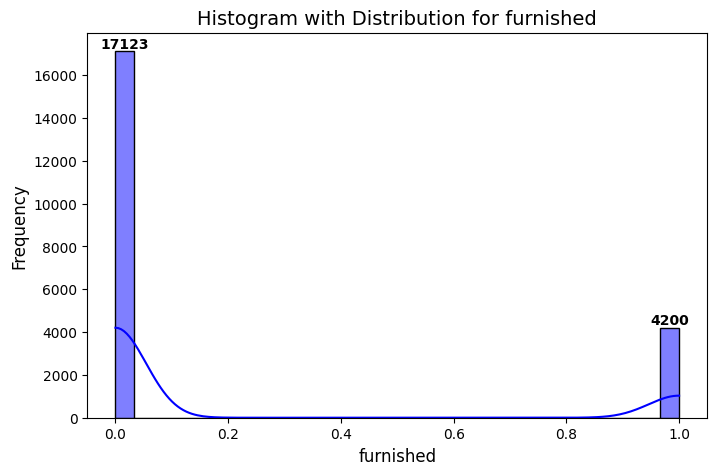

In [ ]:
visulation_column(df=df, column_name="furnished", figsize=(8, 5))

for categorical features we use to check wheather the full feature is filled with only a single category,</br>
if so we will terminate the full feature

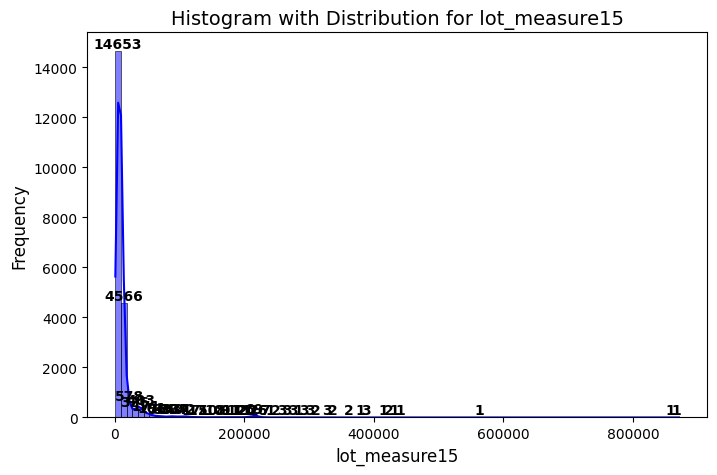

In [ ]:
visulation_column(df=df, column_name="lot_measure15", figsize=(8, 5), bins=100)

In [ ]:
df.lot_measure15.describe()

count     21323.000000
mean      12757.735638
std       27234.571068
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: lot_measure15, dtype: float64

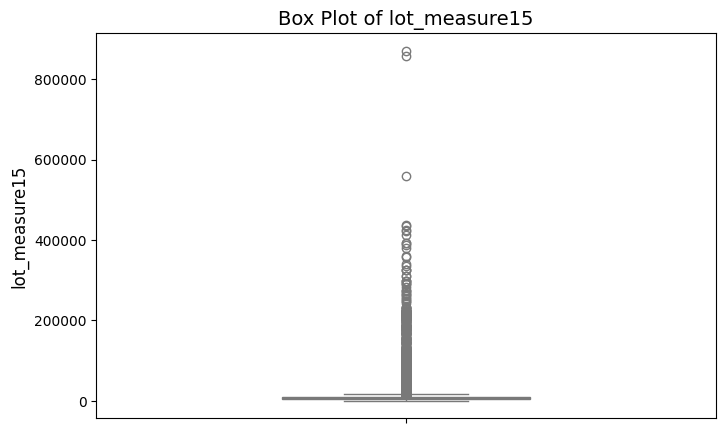

In [ ]:
box_plot(df=df, column_name="lot_measure15")

Original Data Size: 21323 rows
Cleaned Data Size: 19695 rows (Outliers Removed)


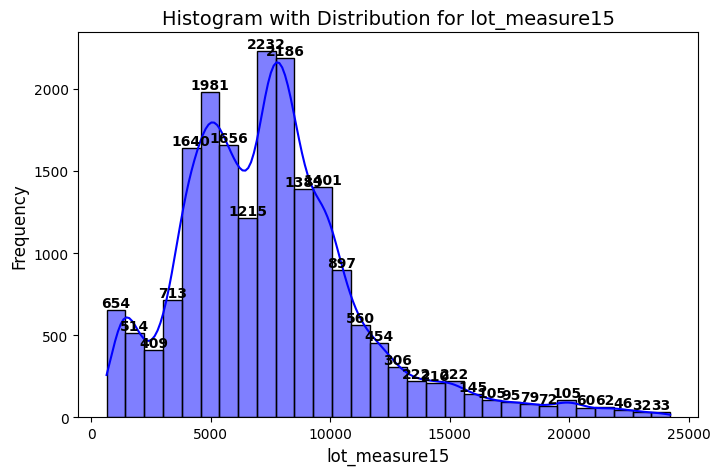

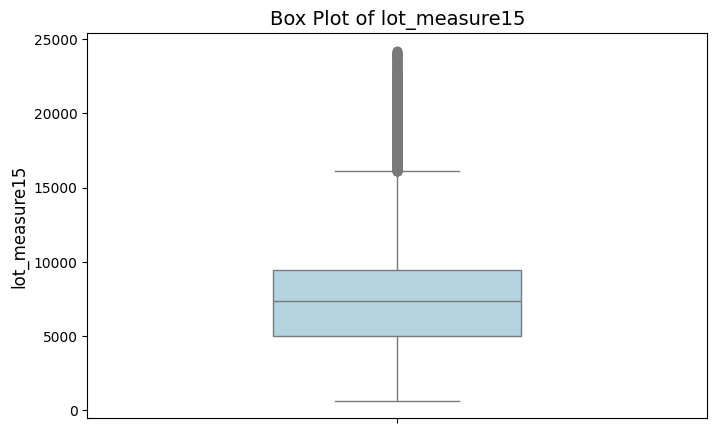

In [ ]:
tmp_df = removing_outliers(df=df, column_name="lot_measure15", quantile_range=(0, 0.75)) ## quantile
visulation_column(df=tmp_df, column_name="lot_measure15")
box_plot(df=tmp_df, column_name="lot_measure15")

Total Data Loss == 8.87% with ll=0 and ul=0.75

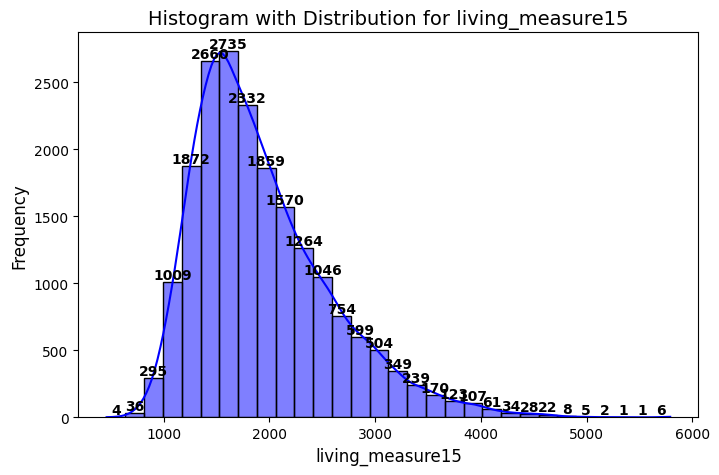

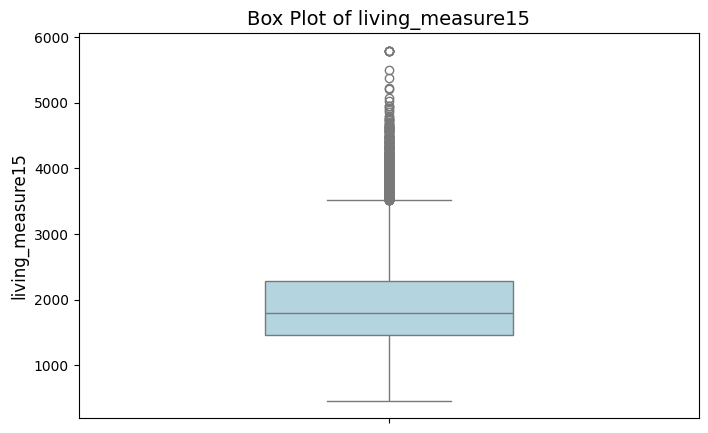

In [ ]:
visulation_column(df=tmp_df, column_name="living_measure15")
box_plot(df=tmp_df, column_name="living_measure15")

In [ ]:
tmp_df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'year', 'month',
       'weekday'],
      dtype='object')

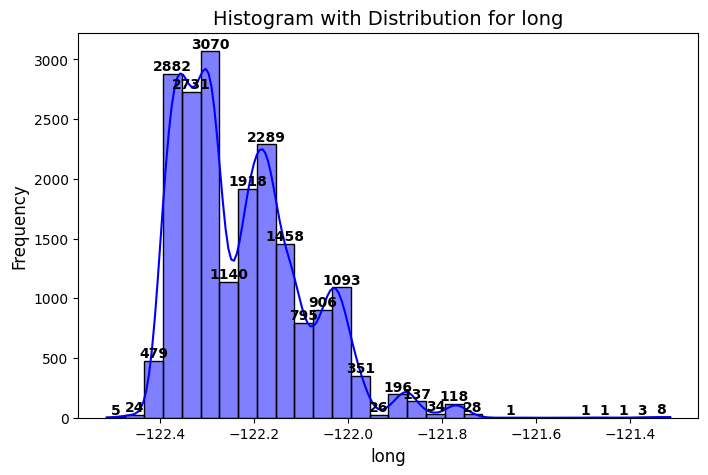

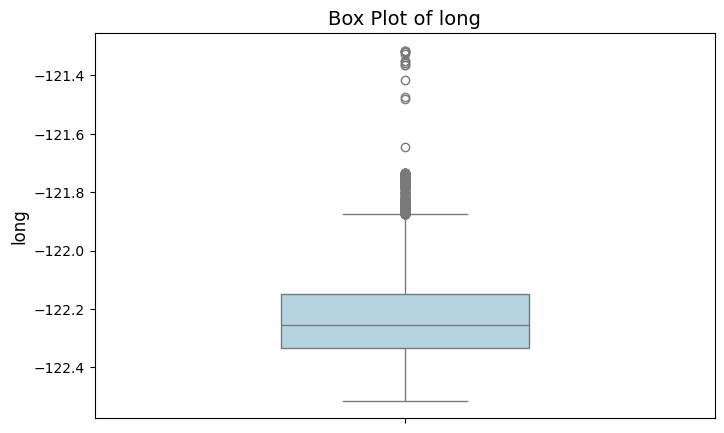

In [ ]:
visulation_column(df=tmp_df, column_name="long")
box_plot(df=tmp_df, column_name="long")

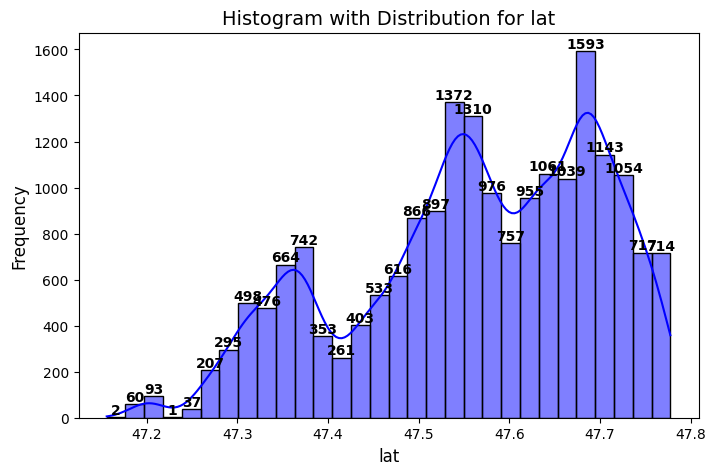

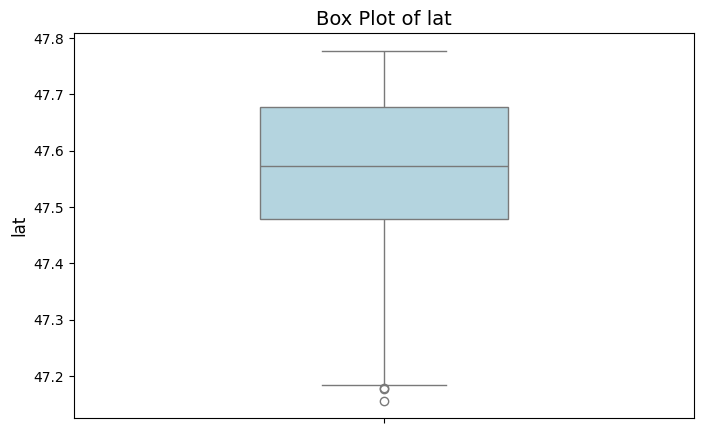

In [ ]:
visulation_column(df=tmp_df, column_name="lat")
box_plot(df=tmp_df, column_name="lat")

In [ ]:
len(tmp_df["basement"].unique())

287

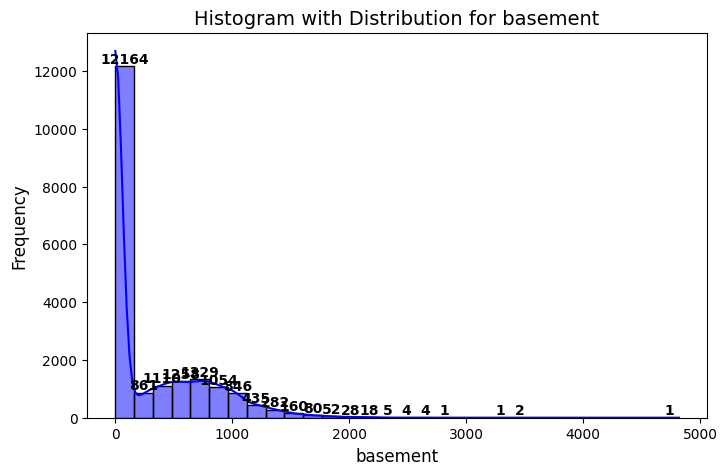

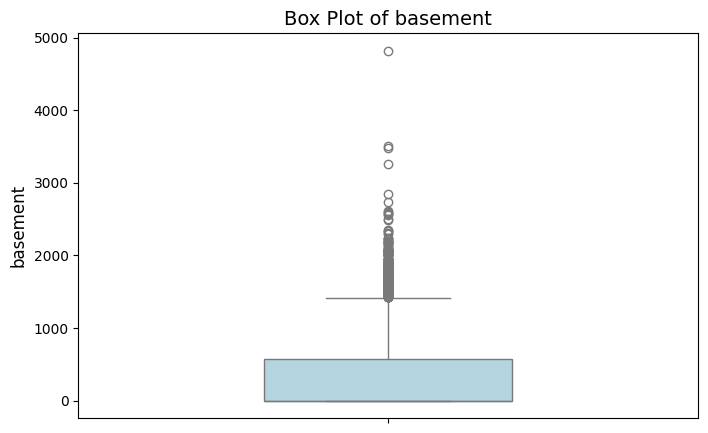

In [ ]:
visulation_column(df=tmp_df, column_name="basement")
box_plot(df=tmp_df, column_name="basement")

In [ ]:
tmp_df["basement"].unique()

array([1250.,    0., 1320., 1000.,  480.,  610., 1050.,  700.,  430.,
        560.,  250.,  670.,  570.,  290.,  600.,  680.,  380.,   50.,
       1020.,  690., 1010.,  530., 1370., 1040.,  790.,  910., 1850.,
        500.,  760.,  960.,  340.,  800.,  580., 1600., 1680.,  420.,
        450.,  200.,  240.,  950., 1220.,  710.,   80.,  140., 1260.,
        860.,  890.,  900.,  280.,  440.,  220., 1650.,  630.,  780.,
        810.,  300.,  720.,  150., 1180., 1060.,  120.,  660.,  400.,
       1100., 1780.,  640., 1170., 1890.,  130.,  550.,  360.,  650.,
        820., 2730.,  870.,  730.,  470., 1350., 1530.,  620., 1080.,
       1900.,  770.,  520.,  920., 1110.,  830., 1420., 1590.,  980.,
        190.,  330.,  350.,  740., 1570., 1390.,  260., 1300.,  265.,
       1120.,  460.,  370., 1830., 1140.,  880.,  940.,  270.,  145.,
        510.,  750., 1710.,  930., 1870., 1200.,  310.,  850.,  506.,
        970., 1070., 1450.,  990.,  840.,   90., 3500., 1380., 1090.,
       1280., 1240.,

In [ ]:
(tmp_df["basement"] == 0).sum()

np.int64(11819)

60% records of basement is 0 which means in these houses no basement present.</br>
We are going to convert it into categorical data.</br>
0 --> no basement</br>
1 --> basement present</br>
new column name will be **is_basement**

In [ ]:
# tmp_df.drop(columns=['basement'], inplace=True)
print(tmp_df.shape)
tmp_df.columns

(19695, 23)


Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'year', 'month',
       'weekday'],
      dtype='object')

In [ ]:
tmp_df["is_basement"] = tmp_df["basement"].apply(lambda x: 0 if x == 0 else 1)
tmp_df.head()

<ipython-input-56-db14e77a4c48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df["is_basement"] = tmp_df["basement"].apply(lambda x: 0 if x == 0 else 1)


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
0    0.0          3      8.0        1800.0    1250.0      1966             0   
1    0.0          4      6.0         670.0       0.0      1948             0   
2    4.0          3      8.0        3040.0       0.0      1966             0   
3    0.0          3      8.0        1740.0       0.0      2009             0   
4    0.0          3      7.0        1120.0       0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0        0.0   
1    98118  47.5546 -122.274            1660.0         4100.0        0.0   
2    98118  47.5188 -122.256            2620.0         2433.0        0.0   
3    98002  47.3363 -122.213            2030.0         3794.0        0.0   
4    98118  47.5663 -122.285            1120.0         5100.0        0.0   

   year  month    weekday  is_basement  
0  2015      4     Monday            1  
1  2015      3    Tuesday            0  
2  2014      8  Wednesday            0  
3  2014     10     Friday            0  
4  2015      2  Wednesday            0

In [ ]:
del tmp_df["basement"]

In [ ]:
renovated_years = tmp_df["yr_renovated"].unique()
built_years = tmp_df["yr_built"].unique()
print(renovated_years)
print()
print(built_years)
print(len(renovated_years), len(built_years))

[   0 1993 2014 1983 1992 2000 2011 2009 1944 1971 2003 1955 2008 2015
 2005 1979 1998 1968 2010 1989 2002 1985 1987 1996 1940 1986 1988 1969
 2004 1995 2007 2013 2001 1990 1958 2012 1967 1991 1970 1984 2006 1982
 1951 1960 1994 1997 1980 1999 1959 1973 1975 1981 1963 1956 1957 1976
 1948 1945 1977 1978 1972 1965 1964 1953 1974 1950 1962 1946 1934 1954]

[1966 1948 2009 1924 2005 1978 1983 2012 1912 1967 1919 1908 1950 2000
 2013 1943 1922 1977 2004 1964 1945 2008 1940 2003 1988 1985 1998 1946
 1990 1984 1958 1963 1942 2014 1971 1936 1954 1923 2002 1972 2007 1930
 1935 1962 1999 1953 1965 1994 2010 1997 2006 1979 1996 1992 1968 1980
 1969 2001 1981 1929 1952 1916 1976 1974 1987 1920 1931 1975 1995 1960
 1900 1986 1989 1906 1955 1956 1915 1941 1993 2011 1925 1947 1926 1927
 1951 1932 1917 1928 1959 1921 1911 1949 1982 1991 1913 1961 1957 1914
 1938 1973 1937 1944 1970 1901 1907 1939 1918 1904 2015 1909 1910 1905
 1902 1903 1934 1933]
70 116


In [ ]:
no_renovation_counts = (tmp_df["yr_renovated"] == 0).sum()
no_renovation_counts

np.int64(18891)

In [ ]:
percentage_of_no_rennovation = no_renovation_counts/tmp_df.shape[0]*100
percentage_of_no_rennovation

np.float64(95.91774562071592)

Huge number of records are having non renovated buildings, will convert them to categorical data:</br>
0 --> no renivation</br>
1 --> renovation

In [ ]:
built_years.sort()

In [ ]:
built_years

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

May convert the built years into sections with a customizable range of 10 years each set</br>
Hence we may reduce number of categories for our categorical field

In [ ]:
tmp_df["is_renovated"] = tmp_df["yr_renovated"].apply(lambda given_date: 0 if given_date == 0 else 1)
tmp_df[tmp_df["yr_renovated"] != 0]

<ipython-input-63-bf332614f59d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df["is_renovated"] = tmp_df["yr_renovated"].apply(lambda given_date: 0 if given_date == 0 else 1)


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
18      968060       4.0       2.50          2620.0      16200.0   1.0    0.0   
84      733000       3.0       1.75          1740.0       3060.0   1.0    0.0   
129     375000       4.0       2.25          1450.0       7245.0   1.0    0.0   
165     835000       3.0       1.75          1490.0       3840.0   2.0    0.0   
296    1160000       3.0       2.50          2740.0       5925.0   2.0    0.0   
...        ...       ...        ...             ...          ...   ...    ...   
21475  1100000       5.0       2.50          3890.0      27311.0   2.0    0.0   
21482   750000       5.0       3.25          2750.0       7500.0   2.0    0.0   
21507   250000       3.0       1.50          2390.0      23522.0   1.0    0.0   
21573   385000       4.0       3.00          2253.0       7700.0   2.0    0.0   
21586   880000       4.0       3.50          2800.0       6750.0   2.0    0.0   

       sight  condition  quality  ceil_measure  yr_built  yr_renovated  \
18       2.0          4      7.0        1570.0      1950          1993   
84       0.0          5      8.0         950.0      1930          2014   
129      0.0          5      7.0        1450.0      1950          1983   
165      0.0          3      8.0        1490.0      1984          2014   
296      2.0          3     10.0        2740.0      1913          1992   
...      ...        ...      ...           ...       ...           ...   
21475    2.0          3     10.0        3890.0      1950          1990   
21482    1.0          3      7.0        2150.0      1937          1997   
21507    0.0          2      7.0        1890.0      1938          1968   
21573    0.0          3      7.0        2253.0      1957          2014   
21586    0.0          3      9.0        1890.0      1951          2002   

       zipcode      lat     long  living_measure15  lot_measure15  furnished  \
18       98033  47.6623 -122.196            3050.0        11875.0        0.0   
84       98115  47.6816 -122.310            1800.0         3960.0        0.0   
129      98133  47.7643 -122.343            1660.0         7800.0        0.0   
165      98033  47.6916 -122.214            3450.0         8500.0        0.0   
296      98112  47.6313 -122.303            2740.0         5948.0        1.0   
...        ...      ...      ...               ...            ...        ...   
21475    98177  47.7291 -122.363            3160.0        22641.0        1.0   
21482    98033  47.6636 -122.203            2750.0         7500.0        0.0   
21507    98059  47.4754 -122.090            2430.0        23958.0        0.0   
21573    98198  47.3935 -122.300            1786.0         9052.0        0.0   
21586    98105  47.6690 -122.275            2370.0         6120.0        1.0   

       year  month    weekday  is_basement  is_renovated  
18     2014      8    Tuesday            1             1  
84     2014      8     Friday            1             1  
129    2014      9     Friday            0             1  
165    2014     12  Wednesday            0             1  
296    2014      6    Tuesday            0             1  
...     ...    ...        ...          ...           ...  
21475  2014     11   Thursday            0             1  
21482  2014      6    Tuesday            1             1  
21507  2015      4     Monday            1             1  
21573  2015      4   Thursday            0             1  
21586  2014      9    Tuesday            1             1  

[804 rows x 24 columns]

In [ ]:
del tmp_df["yr_renovated"]

**Approch2**: Will convert yr_built to **Building Age**

In [ ]:
from datetime import datetime
current_year = datetime.now().year

In [ ]:
tmp_df["age"] = tmp_df["yr_built"].apply(lambda given_date: current_year-given_date)
tmp_df.head()

<ipython-input-66-bf79b5a0ba2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df["age"] = tmp_df["yr_built"].apply(lambda given_date: current_year-given_date)


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  yr_built  zipcode      lat  \
0    0.0          3      8.0        1800.0      1966    98034  47.7228   
1    0.0          4      6.0         670.0      1948    98118  47.5546   
2    4.0          3      8.0        3040.0      1966    98118  47.5188   
3    0.0          3      8.0        1740.0      2009    98002  47.3363   
4    0.0          3      7.0        1120.0      1924    98118  47.5663   

      long  living_measure15  lot_measure15  furnished  year  month  \
0 -122.183            2020.0         8660.0        0.0  2015      4   
1 -122.274            1660.0         4100.0        0.0  2015      3   
2 -122.256            2620.0         2433.0        0.0  2014      8   
3 -122.213            2030.0         3794.0        0.0  2014     10   
4 -122.285            1120.0         5100.0        0.0  2015      2   

     weekday  is_basement  is_renovated  age  
0     Monday            1             0   59  
1    Tuesday            0             0   77  
2  Wednesday            0             0   59  
3     Friday            0             0   16  
4  Wednesday            0             0  101

In [ ]:
del tmp_df["yr_built"]

In [ ]:
tmp_df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15',
       'furnished', 'year', 'month', 'weekday', 'is_basement', 'is_renovated',
       'age'],
      dtype='object')

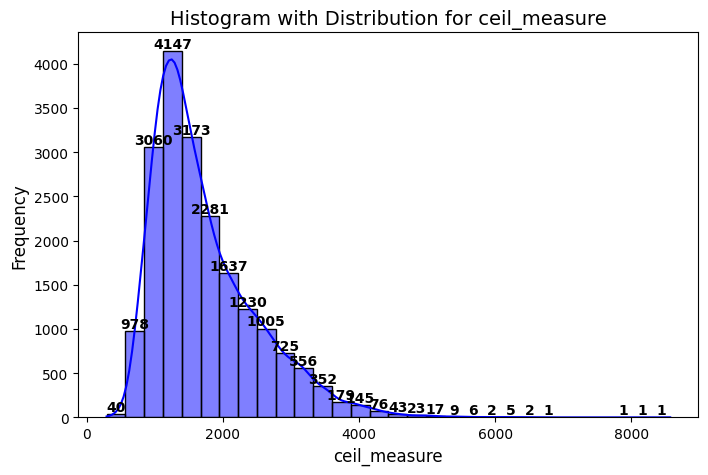

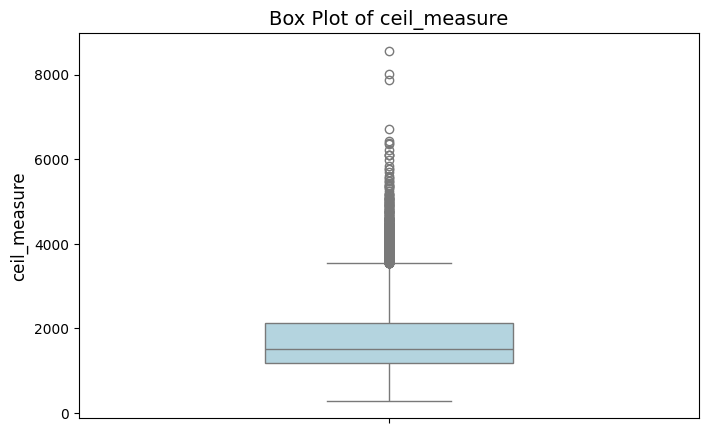

In [ ]:
visulation_column(df=tmp_df, column_name="ceil_measure")
box_plot(df=tmp_df, column_name="ceil_measure")

Original Data Size: 19695 rows
Cleaned Data Size: 19641 rows (Outliers Removed)


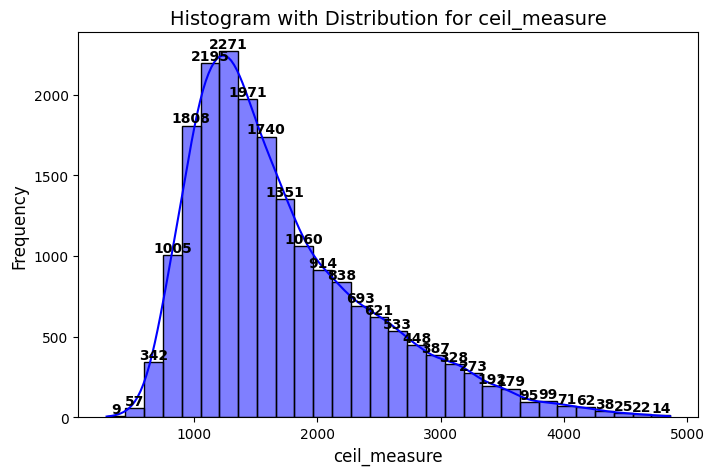

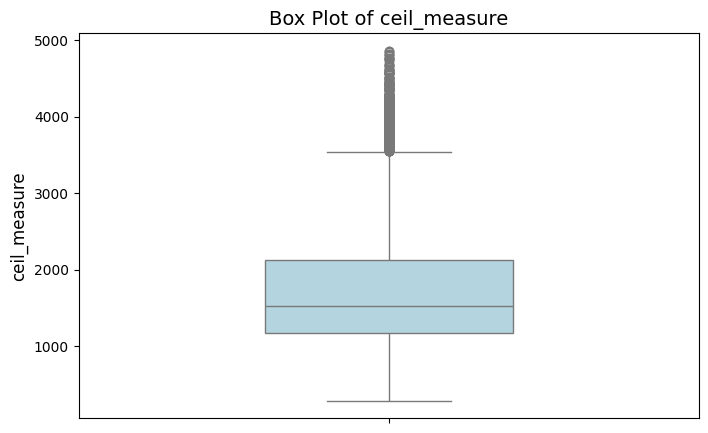

In [ ]:
tmp_df_v2 = removing_outliers(df=tmp_df, column_name="ceil_measure", quantile_range=(0, 0.75))
visulation_column(df=tmp_df_v2, column_name="ceil_measure")
box_plot(df=tmp_df_v2, column_name="ceil_measure")

In [ ]:
## percentage data loss for above process
(21323-19641)/21323 * 100

7.888195844862356

In [ ]:
tmp_df_v2.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15',
       'furnished', 'year', 'month', 'weekday', 'is_basement', 'is_renovated',
       'age'],
      dtype='object')

In [ ]:
tmp_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19641 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19641 non-null  int64  
 1   room_bed          19641 non-null  float64
 2   room_bath         19641 non-null  float64
 3   living_measure    19641 non-null  float64
 4   lot_measure       19641 non-null  float64
 5   ceil              19641 non-null  float64
 6   coast             19641 non-null  float64
 7   sight             19641 non-null  float64
 8   condition         19641 non-null  int64  
 9   quality           19641 non-null  float64
 10  ceil_measure      19641 non-null  float64
 11  zipcode           19641 non-null  int64  
 12  lat               19641 non-null  float64
 13  long              19641 non-null  float64
 14  living_measure15  19641 non-null  float64
 15  lot_measure15     19641 non-null  float64
 16  furnished         19641 non-null  float64
 17

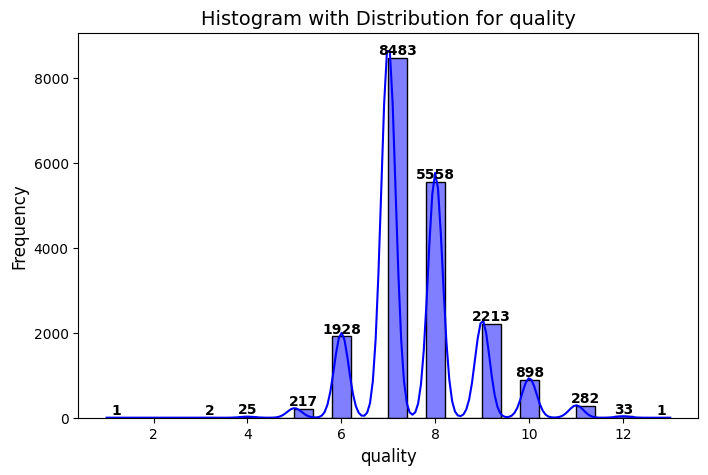

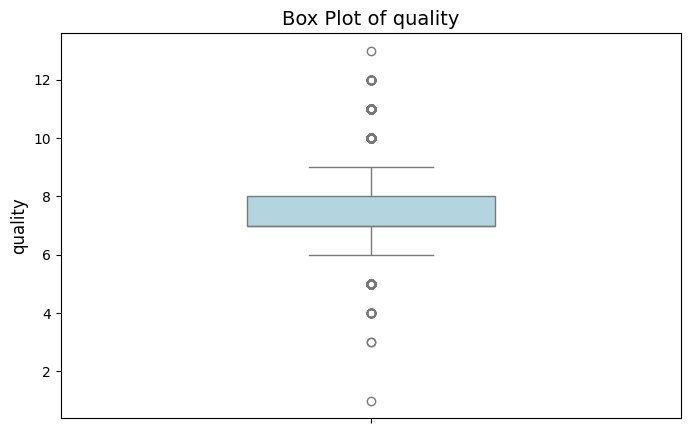

In [ ]:
visulation_column(df=tmp_df_v2, column_name="quality")
box_plot(df=tmp_df_v2, column_name="quality")

Quality has been given as rating form (out of 10) so will keen it as it is


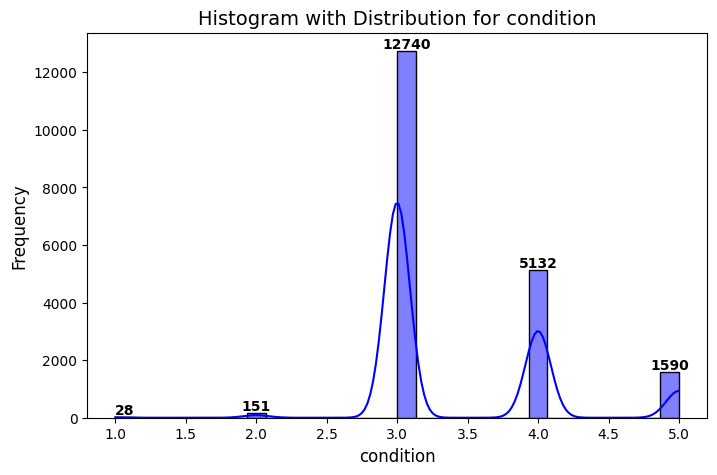

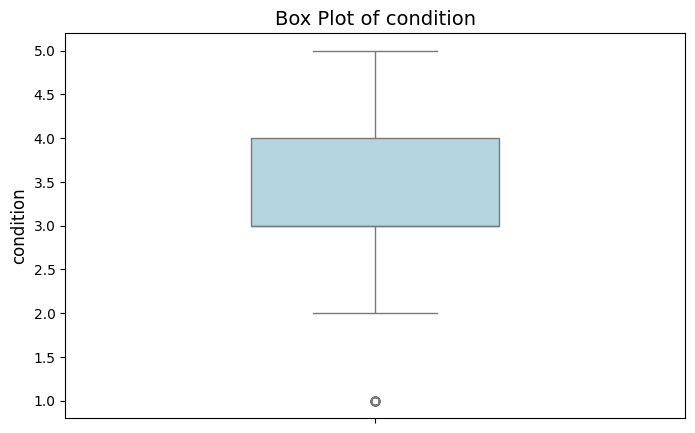

In [ ]:
visulation_column(df=tmp_df_v2, column_name="condition")
box_plot(df=tmp_df_v2, column_name="condition")

Condition has been given as rating form (out of 5) so will keen it as it is



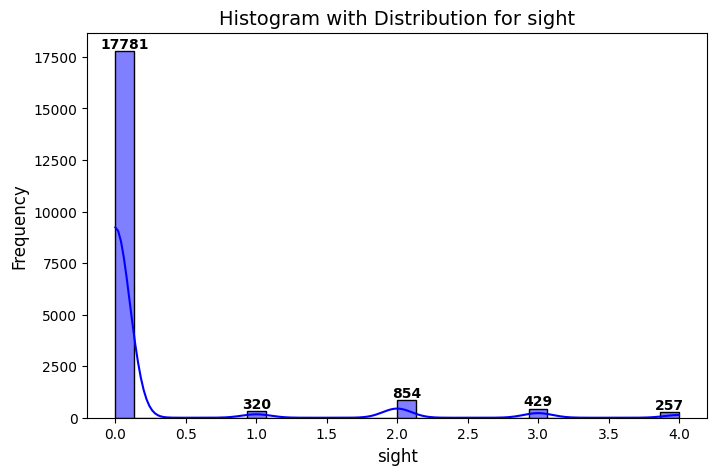

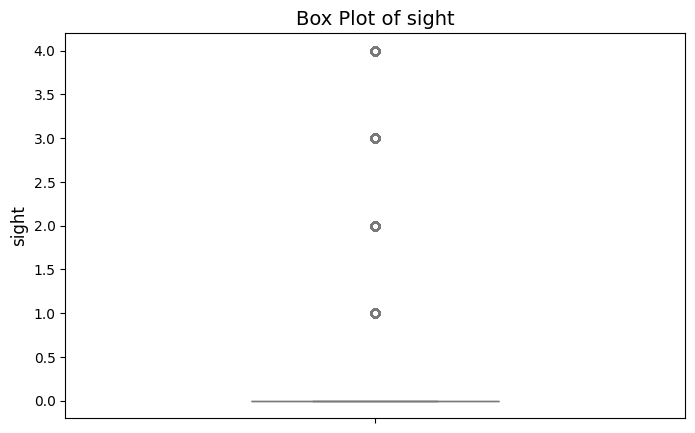

In [ ]:
visulation_column(df=tmp_df_v2, column_name="sight")
box_plot(df=tmp_df_v2, column_name="sight")

In [ ]:
tmp_df_v2["sight"].unique()

array([0., 4., 2., 3., 1.])

Sight has been treated as integral form so will keen it as it is.</br>
More the sight, well the property.



In [ ]:
tmp_df_v2["coast"].unique() ## categorical

array([0., 1.])

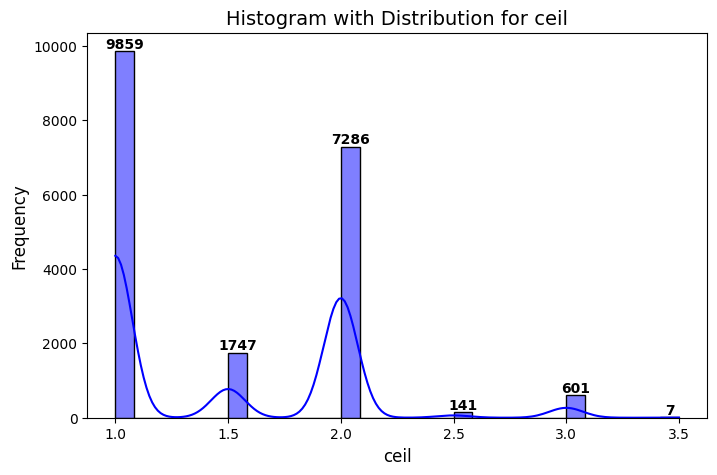

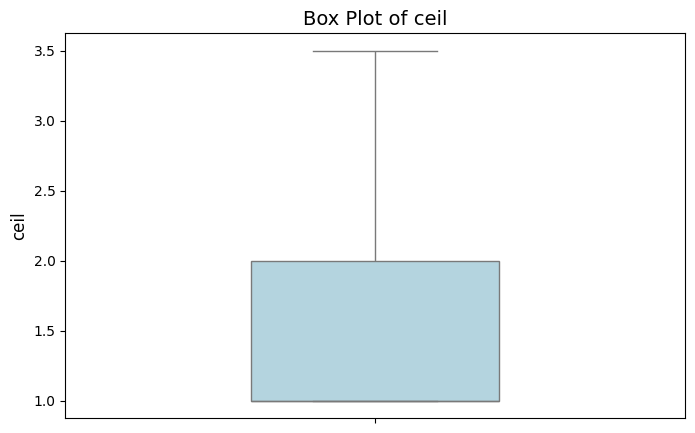

In [ ]:
visulation_column(df=tmp_df_v2, column_name="ceil")
box_plot(df=tmp_df_v2, column_name="ceil")

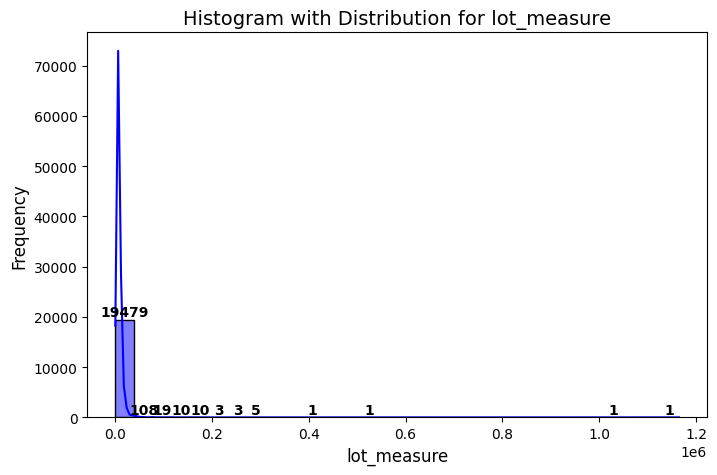

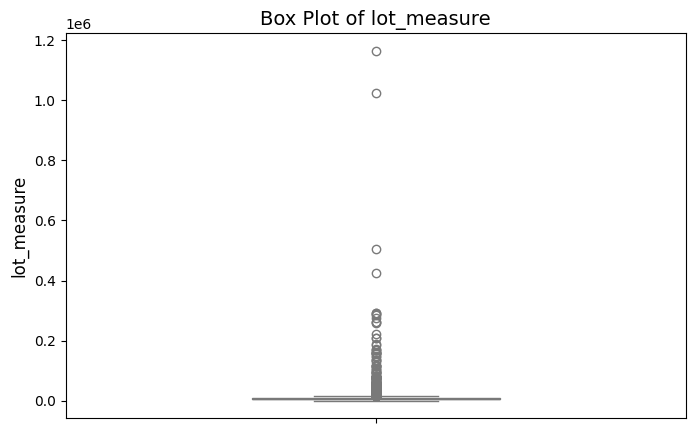

In [ ]:
visulation_column(df=tmp_df_v2, column_name="lot_measure")
box_plot(df=tmp_df_v2, column_name="lot_measure")

In [ ]:
len(tmp_df_v2["lot_measure"].unique())

8465

Original Data Size: 19641 rows
Cleaned Data Size: 19279 rows (Outliers Removed)


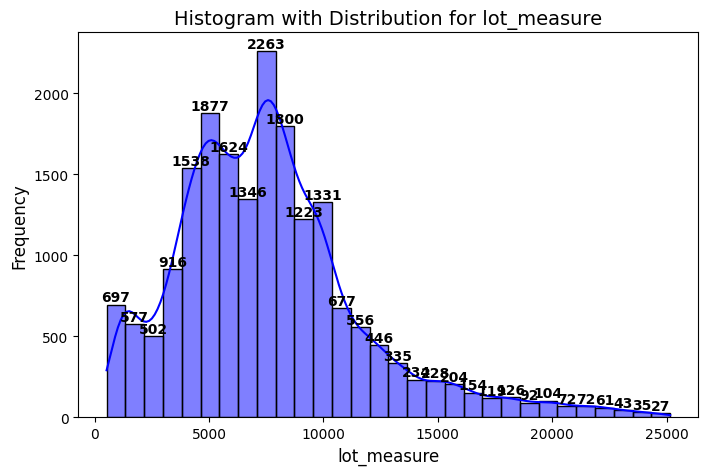

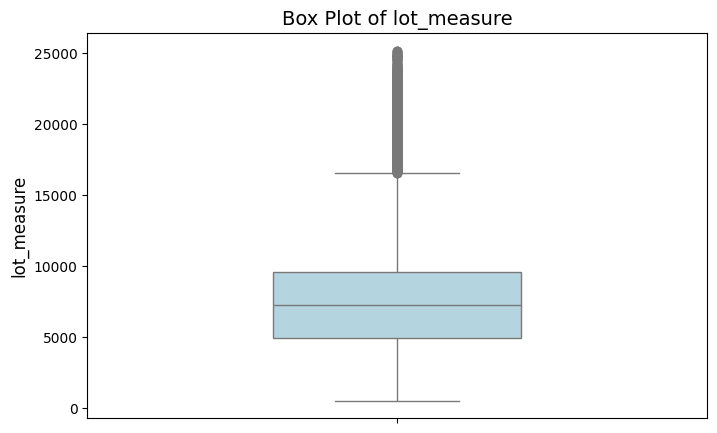

In [ ]:
tmp_df_v3 = removing_outliers(df=tmp_df_v2, column_name="lot_measure", quantile_range=(0, 0.8))
visulation_column(df=tmp_df_v3, column_name="lot_measure")
box_plot(df=tmp_df_v3, column_name="lot_measure")

In [ ]:
## percentage data loss for above process
inittial_number_of_records = 21323
(inittial_number_of_records-19279)/21323 * 100

9.585893167002766

In [ ]:
tmp_df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19279 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19279 non-null  int64  
 1   room_bed          19279 non-null  float64
 2   room_bath         19279 non-null  float64
 3   living_measure    19279 non-null  float64
 4   lot_measure       19279 non-null  float64
 5   ceil              19279 non-null  float64
 6   coast             19279 non-null  float64
 7   sight             19279 non-null  float64
 8   condition         19279 non-null  int64  
 9   quality           19279 non-null  float64
 10  ceil_measure      19279 non-null  float64
 11  zipcode           19279 non-null  int64  
 12  lat               19279 non-null  float64
 13  long              19279 non-null  float64
 14  living_measure15  19279 non-null  float64
 15  lot_measure15     19279 non-null  float64
 16  furnished         19279 non-null  float64
 17

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21323 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21323 non-null  int64  
 1   room_bed          21323 non-null  float64
 2   room_bath         21323 non-null  float64
 3   living_measure    21323 non-null  float64
 4   lot_measure       21323 non-null  float64
 5   ceil              21323 non-null  float64
 6   coast             21323 non-null  float64
 7   sight             21323 non-null  float64
 8   condition         21323 non-null  int64  
 9   quality           21323 non-null  float64
 10  ceil_measure      21323 non-null  float64
 11  basement          21323 non-null  float64
 12  yr_built          21323 non-null  int64  
 13  yr_renovated      21323 non-null  int64  
 14  zipcode           21323 non-null  int64  
 15  lat               21323 non-null  float64
 16  long              21323 non-null  float64
 17

In [ ]:
df.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
0    0.0          3      8.0        1800.0    1250.0      1966             0   
1    0.0          4      6.0         670.0       0.0      1948             0   
2    4.0          3      8.0        3040.0       0.0      1966             0   
3    0.0          3      8.0        1740.0       0.0      2009             0   
4    0.0          3      7.0        1120.0       0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0        0.0   
1    98118  47.5546 -122.274            1660.0         4100.0        0.0   
2    98118  47.5188 -122.256            2620.0         2433.0        0.0   
3    98002  47.3363 -122.213            2030.0         3794.0        0.0   
4    98118  47.5663 -122.285            1120.0         5100.0        0.0   

   year  month    weekday  
0  2015      4     Monday  
1  2015      3    Tuesday  
2  2014      8  Wednesday  
3  2014     10     Friday  
4  2015      2  Wednesday

In [ ]:
tmp_df_v3.head(100)

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0    600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1    190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2    735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3    257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4    450000       2.0       1.00          1120.0       4590.0   1.0    0.0   
..      ...       ...        ...             ...          ...   ...    ...   
102  425000       5.0       1.75          1400.0       5071.0   1.0    0.0   
104  502775       3.0       1.75          1700.0       9840.0   1.0    0.0   
105  206135       3.0       1.00          1340.0      11070.0   1.0    0.0   
106  315000       3.0       1.75          1580.0      11455.0   1.0    0.0   
107  248000       3.0       1.75          1330.0       9831.0   1.0    0.0   

     sight  condition  quality  ceil_measure  zipcode      lat     long  \
0      0.0          3      8.0        1800.0    98034  47.7228 -122.183   
1      0.0          4      6.0         670.0    98118  47.5546 -122.274   
2      4.0          3      8.0        3040.0    98118  47.5188 -122.256   
3      0.0          3      8.0        1740.0    98002  47.3363 -122.213   
4      0.0          3      7.0        1120.0    98118  47.5663 -122.285   
..     ...        ...      ...           ...      ...      ...      ...   
102    0.0          3      5.0        1400.0    98014  47.6499 -121.908   
104    0.0          4      8.0        1200.0    98027  47.5192 -122.046   
105    0.0          4      7.0        1340.0    98030  47.3527 -122.178   
106    0.0          4      7.0        1200.0    98059  47.4756 -122.147   
107    0.0          3      7.0        1330.0    98001  47.3304 -122.277   

     living_measure15  lot_measure15  furnished  year  month    weekday  \
0              2020.0         8660.0        0.0  2015      4     Monday   
1              1660.0         4100.0        0.0  2015      3    Tuesday   
2              2620.0         2433.0        0.0  2014      8  Wednesday   
3              2030.0         3794.0        0.0  2014     10     Friday   
4              1120.0         5100.0        0.0  2015      2  Wednesday   
..                ...            ...        ...   ...    ...        ...   
102            1200.0         7500.0        0.0  2015      3   Thursday   
104            2040.0        14169.0        0.0  2015      1     Friday   
105            1650.0         7630.0        0.0  2014      6     Friday   
106            1550.0        10650.0        0.0  2015      2  Wednesday   
107            1330.0         7500.0        0.0  2014     11     Friday   

     is_basement  is_renovated  age  
0              1             0   59  
1              0             0   77  
2              0             0   59  
3              0             0   16  
4              0             0  101  
..           ...           ...  ...  
102            0             0  109  
104            1             0   49  
105            0             0   47  
106            1             0   51  
107            0             0   38  

[100 rows x 23 columns]

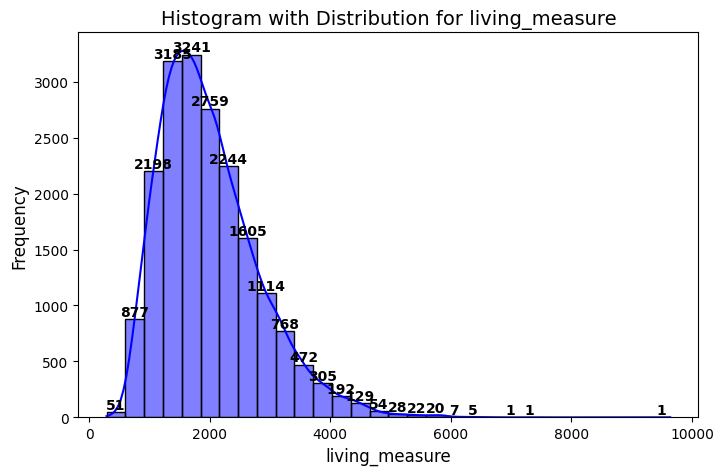

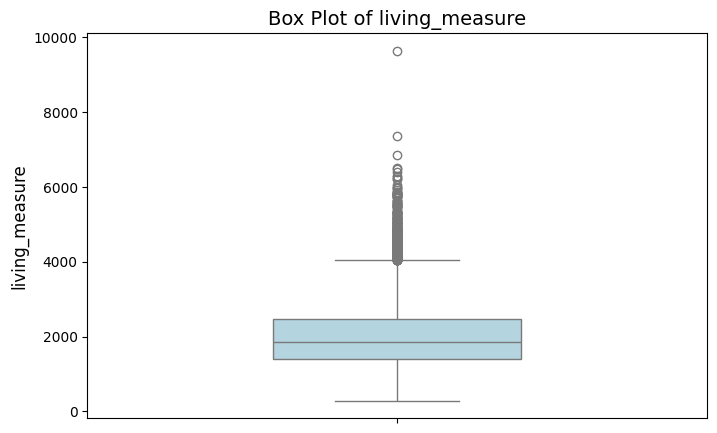

In [ ]:
visulation_column(df=tmp_df_v3, column_name="living_measure")
box_plot(df=tmp_df_v3, column_name="living_measure")

Original Data Size: 19279 rows
Cleaned Data Size: 19269 rows (Outliers Removed)


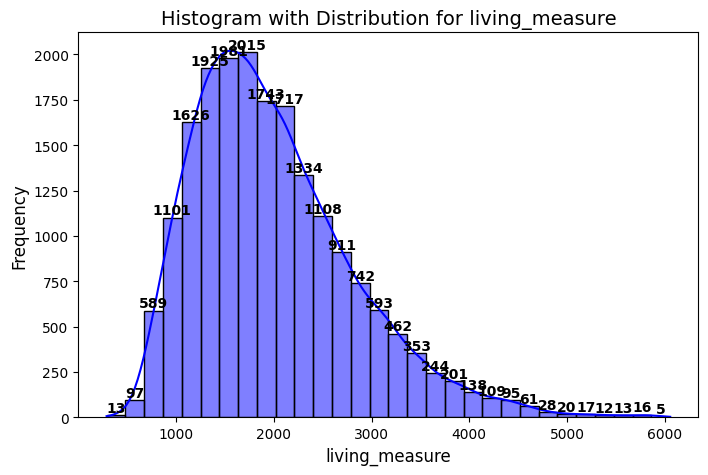

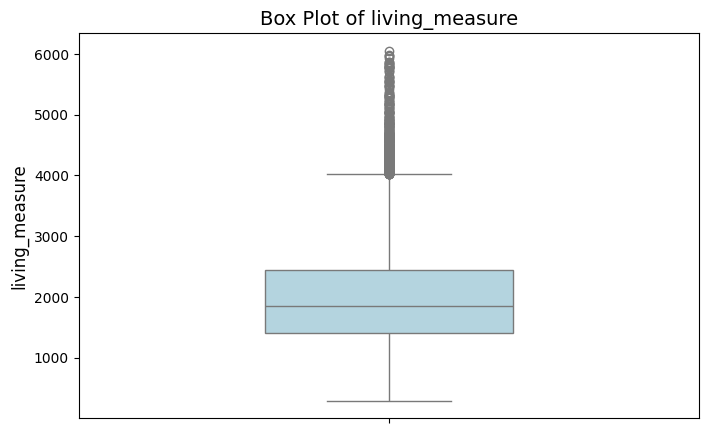

In [ ]:
tmp_df_v4 = removing_outliers(df=tmp_df_v3, column_name="living_measure", quantile_range=(0, 0.8)) ## quantile
visulation_column(df=tmp_df_v4, column_name="living_measure")
box_plot(df=tmp_df_v4, column_name="living_measure")

In [ ]:
## percentage data loss for above process
inittial_number_of_records = 21323
(inittial_number_of_records-19269)/21323 * 100

9.632790883083993

In [ ]:
tmp_df_v4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19269 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19269 non-null  int64  
 1   room_bed          19269 non-null  float64
 2   room_bath         19269 non-null  float64
 3   living_measure    19269 non-null  float64
 4   lot_measure       19269 non-null  float64
 5   ceil              19269 non-null  float64
 6   coast             19269 non-null  float64
 7   sight             19269 non-null  float64
 8   condition         19269 non-null  int64  
 9   quality           19269 non-null  float64
 10  ceil_measure      19269 non-null  float64
 11  zipcode           19269 non-null  int64  
 12  lat               19269 non-null  float64
 13  long              19269 non-null  float64
 14  living_measure15  19269 non-null  float64
 15  lot_measure15     19269 non-null  float64
 16  furnished         19269 non-null  float64
 17

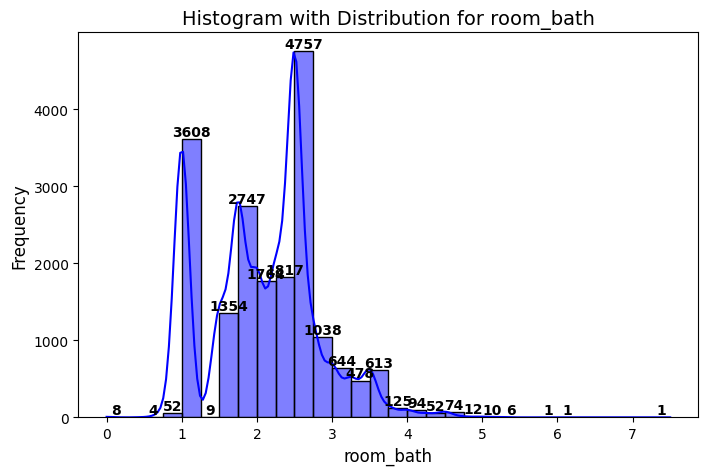

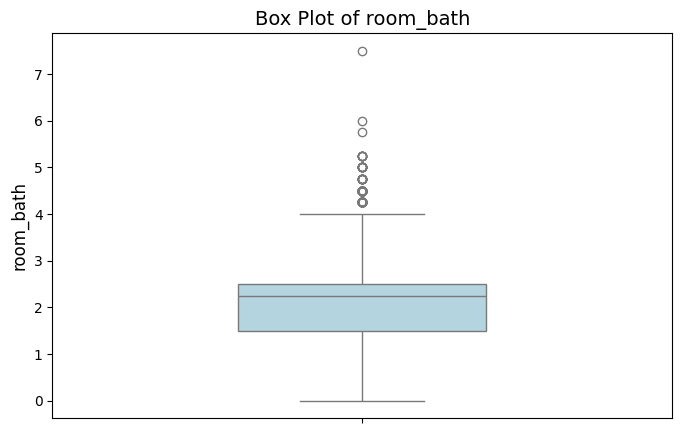

In [ ]:
visulation_column(df=tmp_df_v4, column_name="room_bath")
box_plot(df=tmp_df_v4, column_name="room_bath")

In [ ]:
tmp_df_v4["room_bath"].unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75, 4.25, 4.5 , 4.75, 5.25, 0.75, 0.  , 1.25, 7.5 , 0.5 , 5.  ,
       5.75, 6.  ])

In [ ]:
tmp_df_v4["room_bed"].unique()

array([ 4.,  2.,  3.,  5.,  6.,  1.,  7., 10.,  8.,  0.,  9., 33., 11.])

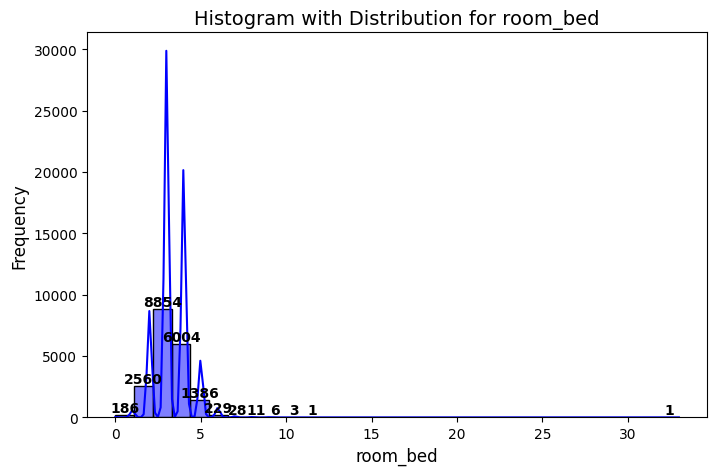

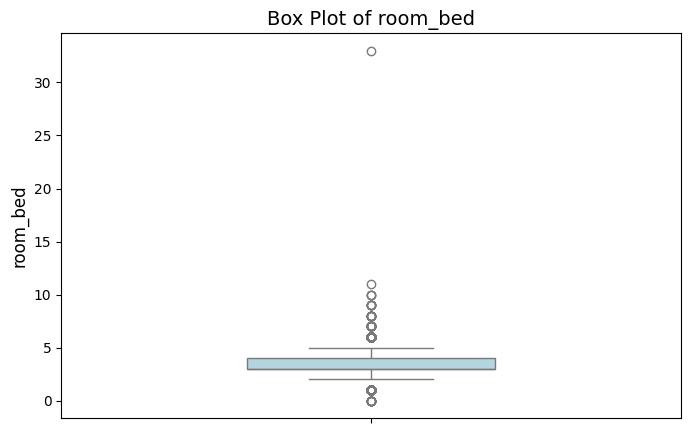

In [ ]:
visulation_column(df=tmp_df_v4, column_name="room_bed")
box_plot(df=tmp_df_v4, column_name="room_bed")

Original Data Size: 19269 rows
Cleaned Data Size: 19268 rows (Outliers Removed)


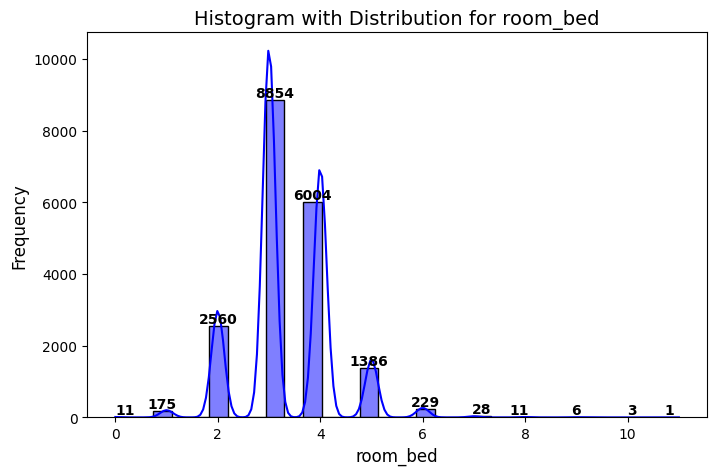

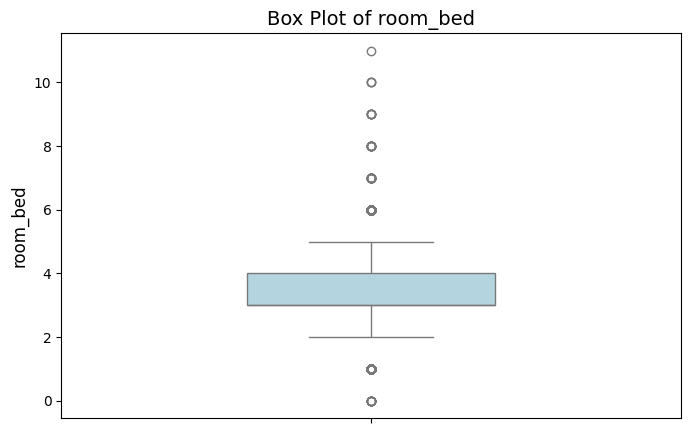

In [ ]:
tmp_df_v5 = removing_outliers(df=tmp_df_v4, column_name="room_bed", quantile_range=(0, 0.99)) ## quantile
visulation_column(df=tmp_df_v5, column_name="room_bed")
box_plot(df=tmp_df_v5, column_name="room_bed")
## removed the 33 bed rooms

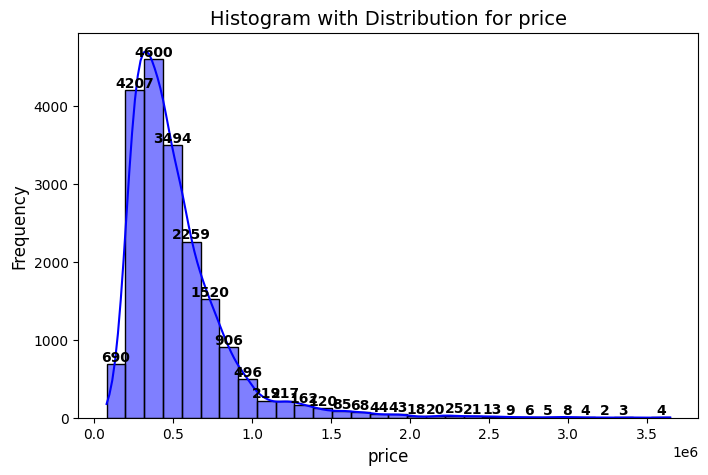

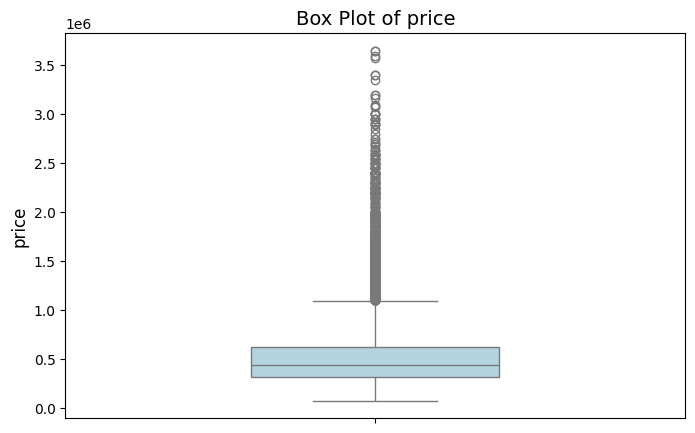

In [ ]:
visulation_column(df=tmp_df_v5, column_name="price")
box_plot(df=tmp_df_v5, column_name="price")

In [ ]:
## percentage data till now
initial_number_of_records = 21323
total_records_now = 19268
percentage_loss = round(((initial_number_of_records - total_records_now) / 21323) * 100, 2)
print(f"The percentage data loss for the given data because of data clearance is: {percentage_loss}%")

The percentage data loss for the given data because of data clearance is: 9.64%


In [ ]:
tmp_df_v5.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15',
       'furnished', 'year', 'month', 'weekday', 'is_basement', 'is_renovated',
       'age'],
      dtype='object')

#### Converting Zipcode to categorical column


In [ ]:
len(tmp_df_v5["zipcode"].unique())

70

In [ ]:
zipcode_unique_values = tmp_df_v5["zipcode"].unique()
unique_values_2 = []
for value in zipcode_unique_values:
  unique_values_2.append(value//20)

print(len(set(unique_values_2)))

10


In [ ]:
print(sorted(tmp_df_v5["zipcode"].unique()))
print("*************")
print(sorted(unique_values_2))

[np.int64(98001), np.int64(98002), np.int64(98003), np.int64(98004), np.int64(98005), np.int64(98006), np.int64(98007), np.int64(98008), np.int64(98010), np.int64(98011), np.int64(98014), np.int64(98019), np.int64(98022), np.int64(98023), np.int64(98024), np.int64(98027), np.int64(98028), np.int64(98029), np.int64(98030), np.int64(98031), np.int64(98032), np.int64(98033), np.int64(98034), np.int64(98038), np.int64(98039), np.int64(98040), np.int64(98042), np.int64(98045), np.int64(98052), np.int64(98053), np.int64(98055), np.int64(98056), np.int64(98058), np.int64(98059), np.int64(98065), np.int64(98070), np.int64(98072), np.int64(98074), np.int64(98075), np.int64(98077), np.int64(98092), np.int64(98102), np.int64(98103), np.int64(98105), np.int64(98106), np.int64(98107), np.int64(98108), np.int64(98109), np.int64(98112), np.int64(98115), np.int64(98116), np.int64(98117), np.int64(98118), np.int64(98119), np.int64(98122), np.int64(98125), np.int64(98126), np.int64(98133), np.int64(9813

*   Total Number of Zipcodes in the Zipcode Feature/Column = 70
*   We are going to treat the Zipcode column as categorical feature because zipcode cannot be quantified or it signifies only a regional postoffice
*   We would have 70 categories, which is huge for converting to One-Hot Encoding.
*   We would reduce the zipcodes to lower values by using floor division and hence we will have code (location codes) for a bigger region and also no significant information loss.



In [ ]:
tmp_df_v5["location_code"] = tmp_df_v5["zipcode"].apply(lambda zipcode: zipcode//20)
tmp_df_v5.head()

<ipython-input-103-90be8fdd389d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df_v5["location_code"] = tmp_df_v5["zipcode"].apply(lambda zipcode: zipcode//20)


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  zipcode      lat     long  \
0    0.0          3      8.0        1800.0    98034  47.7228 -122.183   
1    0.0          4      6.0         670.0    98118  47.5546 -122.274   
2    4.0          3      8.0        3040.0    98118  47.5188 -122.256   
3    0.0          3      8.0        1740.0    98002  47.3363 -122.213   
4    0.0          3      7.0        1120.0    98118  47.5663 -122.285   

   living_measure15  lot_measure15  furnished  year  month    weekday  \
0            2020.0         8660.0        0.0  2015      4     Monday   
1            1660.0         4100.0        0.0  2015      3    Tuesday   
2            2620.0         2433.0        0.0  2014      8  Wednesday   
3            2030.0         3794.0        0.0  2014     10     Friday   
4            1120.0         5100.0        0.0  2015      2  Wednesday   

   is_basement  is_renovated  age  location_code  
0            1             0   59           4901  
1            0             0   77           4905  
2            0             0   59           4905  
3            0             0   16           4900  
4            0             0  101           4905

In [ ]:
tmp_df_v5["location_code"].nunique()

10

In [ ]:
del tmp_df_v5["zipcode"]

In [ ]:
tmp_df_v5 = tmp_df_v5.rename(columns={
    "year": "sold_year",
    "month": "sold_month",
    "weekday": "sold_weekday"
})
tmp_df_v5.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'lat',
       'long', 'living_measure15', 'lot_measure15', 'furnished', 'sold_year',
       'sold_month', 'sold_weekday', 'is_basement', 'is_renovated', 'age',
       'location_code'],
      dtype='object')

In [ ]:
tmp_df_v5.nunique()

price               3438
room_bed              12
room_bath             24
living_measure       895
lot_measure         8121
ceil                   6
coast                  2
sight                  5
condition              5
quality               11
ceil_measure         806
lat                 4831
long                 633
living_measure15     708
lot_measure15       7206
furnished              2
sold_year              2
sold_month            12
sold_weekday           7
is_basement            2
is_renovated           2
age                  116
location_code         10
dtype: int64

In [ ]:
tmp_df_v5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19268 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             19268 non-null  int64  
 1   room_bed          19268 non-null  float64
 2   room_bath         19268 non-null  float64
 3   living_measure    19268 non-null  float64
 4   lot_measure       19268 non-null  float64
 5   ceil              19268 non-null  float64
 6   coast             19268 non-null  float64
 7   sight             19268 non-null  float64
 8   condition         19268 non-null  int64  
 9   quality           19268 non-null  float64
 10  ceil_measure      19268 non-null  float64
 11  lat               19268 non-null  float64
 12  long              19268 non-null  float64
 13  living_measure15  19268 non-null  float64
 14  lot_measure15     19268 non-null  float64
 15  furnished         19268 non-null  float64
 16  sold_year         19268 non-null  int32  
 17

In [ ]:
categorical_columns = ["coast", "furnished", "sold_year", "sold_month", "sold_weekday", "is_basement", "is_renovated", "location"]

In [ ]:
tmp_df_v5["sold_month"].unique()

array([ 4,  3,  8, 10,  2,  7,  6,  5,  1,  9, 11, 12], dtype=int32)

In [ ]:
tmp_df_v5["sold_quarter"] = tmp_df_v5["sold_month"].apply(lambda sold_month: sold_month//3 + 1)

In [ ]:
tmp_df_v5.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure      lat     long  \
0    0.0          3      8.0        1800.0  47.7228 -122.183   
1    0.0          4      6.0         670.0  47.5546 -122.274   
2    4.0          3      8.0        3040.0  47.5188 -122.256   
3    0.0          3      8.0        1740.0  47.3363 -122.213   
4    0.0          3      7.0        1120.0  47.5663 -122.285   

   living_measure15  lot_measure15  furnished  sold_year  sold_month  \
0            2020.0         8660.0        0.0       2015           4   
1            1660.0         4100.0        0.0       2015           3   
2            2620.0         2433.0        0.0       2014           8   
3            2030.0         3794.0        0.0       2014          10   
4            1120.0         5100.0        0.0       2015           2   

  sold_weekday  is_basement  is_renovated  age  location_code  sold_quarter  
0       Monday            1             0   59           4901             2  
1      Tuesday            0             0   77           4905             2  
2    Wednesday            0             0   59           4905             3  
3       Friday            0             0   16           4900             4  
4    Wednesday            0             0  101           4905             1

In [ ]:
df_processed = pd.get_dummies(tmp_df_v5, columns=["location_code", "sold_year", "sold_quarter", "sold_weekday"], dtype=int)
df_processed

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0       600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1       190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2       735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3       257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4       450000       2.0       1.00          1120.0       4590.0   1.0    0.0   
...        ...       ...        ...             ...          ...   ...    ...   
21606   330000       3.0       2.50          2040.0      14071.0   2.0    0.0   
21607   300000       3.0       1.75          1730.0       6900.0   1.0    0.0   
21609   535000       2.0       1.00          1030.0       4841.0   1.0    0.0   
21611   262000       4.0       2.50          1560.0       7800.0   2.0    0.0   
21612  1150000       4.0       2.50          1940.0       4875.0   2.0    0.0   

       sight  condition  quality  ceil_measure      lat     long  \
0        0.0          3      8.0        1800.0  47.7228 -122.183   
1        0.0          4      6.0         670.0  47.5546 -122.274   
2        4.0          3      8.0        3040.0  47.5188 -122.256   
3        0.0          3      8.0        1740.0  47.3363 -122.213   
4        0.0          3      7.0        1120.0  47.5663 -122.285   
...      ...        ...      ...           ...      ...      ...   
21606    0.0          3      7.0        2040.0  47.7278 -121.963   
21607    0.0          4      7.0        1130.0  47.3915 -122.188   
21609    0.0          3      7.0         920.0  47.6860 -122.341   
21611    0.0          3      7.0        1560.0  47.5140 -122.316   
21612    0.0          4      9.0        1940.0  47.6427 -122.304   

       living_measure15  lot_measure15  furnished  sold_month  is_basement  \
0                2020.0         8660.0        0.0           4            1   
1                1660.0         4100.0        0.0           3            0   
2                2620.0         2433.0        0.0           8            0   
3                2030.0         3794.0        0.0          10            0   
4                1120.0         5100.0        0.0           2            0   
...                 ...            ...        ...         ...          ...   
21606            1890.0        14040.0        0.0           1            0   
21607            1950.0         7200.0        0.0           2            1   
21609            1530.0         4944.0        0.0           5            1   
21611            1160.0         7800.0        0.0           2            0   
21612            1790.0         4875.0        1.0          12            0   

       is_renovated  age  location_code_4900  location_code_4901  \
0                 0   59                   0                   1   
1                 0   77                   0                   0   
2                 0   59                   0                   0   
3                 0   16                   1                   0   
4                 0  101                   0                   0   
...             ...  ...                 ...                 ...   
21606             0   30                   1                   0   
21607             0   49                   0                   1   
21609             0   86                   0                   0   
21611             0   28                   0                   0   
21612             0  100                   0                   0   

       location_code_4902  location_code_4903  location_code_4904  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...      

In [ ]:
df_processed.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'lat',
       'long', 'living_measure15', 'lot_measure15', 'furnished', 'sold_month',
       'is_basement', 'is_renovated', 'age', 'location_code_4900',
       'location_code_4901', 'location_code_4902', 'location_code_4903',
       'location_code_4904', 'location_code_4905', 'location_code_4906',
       'location_code_4907', 'location_code_4908', 'location_code_4909',
       'sold_year_2014', 'sold_year_2015', 'sold_quarter_1', 'sold_quarter_2',
       'sold_quarter_3', 'sold_quarter_4', 'sold_quarter_5',
       'sold_weekday_Friday', 'sold_weekday_Monday', 'sold_weekday_Saturday',
       'sold_weekday_Sunday', 'sold_weekday_Thursday', 'sold_weekday_Tuesday',
       'sold_weekday_Wednesday'],
      dtype='object')

In [ ]:
"location_code" in df_processed.columns

False

In [ ]:
del df_processed["sold_month"]

In [ ]:
df_processed.shape

(19268, 43)

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19268 entries, 0 to 21612
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   19268 non-null  int64  
 1   room_bed                19268 non-null  float64
 2   room_bath               19268 non-null  float64
 3   living_measure          19268 non-null  float64
 4   lot_measure             19268 non-null  float64
 5   ceil                    19268 non-null  float64
 6   coast                   19268 non-null  float64
 7   sight                   19268 non-null  float64
 8   condition               19268 non-null  int64  
 9   quality                 19268 non-null  float64
 10  ceil_measure            19268 non-null  float64
 11  lat                     19268 non-null  float64
 12  long                    19268 non-null  float64
 13  living_measure15        19268 non-null  float64
 14  lot_measure15           19268 non-null  flo

In [ ]:
df_processed["quality"].unique()

array([ 8.,  6.,  7., 10.,  9.,  5., 11.,  4., 12.,  1.,  3.])

In [ ]:
int_columns = ["room_bed", "sight", "quality", "coast", "furnished"]
for col in int_columns:
  df_processed[col] = df_processed[col].astype(int)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19268 entries, 0 to 21612
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   19268 non-null  int64  
 1   room_bed                19268 non-null  int64  
 2   room_bath               19268 non-null  float64
 3   living_measure          19268 non-null  float64
 4   lot_measure             19268 non-null  float64
 5   ceil                    19268 non-null  float64
 6   coast                   19268 non-null  int64  
 7   sight                   19268 non-null  int64  
 8   condition               19268 non-null  int64  
 9   quality                 19268 non-null  int64  
 10  ceil_measure            19268 non-null  float64
 11  lat                     19268 non-null  float64
 12  long                    19268 non-null  float64
 13  living_measure15        19268 non-null  float64
 14  lot_measure15           19268 non-null  flo

## Bi-Variate Analysis

In [ ]:
df_processed.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000         4       1.75          3050.0       9440.0   1.0      0   
1  190000         2       1.00           670.0       3101.0   1.0      0   
2  735000         4       2.75          3040.0       2415.0   2.0      1   
3  257000         3       2.50          1740.0       3721.0   2.0      0   
4  450000         2       1.00          1120.0       4590.0   1.0      0   

   sight  condition  quality  ceil_measure      lat     long  \
0      0          3        8        1800.0  47.7228 -122.183   
1      0          4        6         670.0  47.5546 -122.274   
2      4          3        8        3040.0  47.5188 -122.256   
3      0          3        8        1740.0  47.3363 -122.213   
4      0          3        7        1120.0  47.5663 -122.285   

   living_measure15  lot_measure15  furnished  is_basement  is_renovated  age  \
0            2020.0         8660.0          0            1             0   59   
1            1660.0         4100.0          0            0             0   77   
2            2620.0         2433.0          0            0             0   59   
3            2030.0         3794.0          0            0             0   16   
4            1120.0         5100.0          0            0             0  101   

   location_code_4900  location_code_4901  location_code_4902  \
0                   0                   1                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   1                   0                   0   
4                   0                   0                   0   

   location_code_4903  location_code_4904  location_code_4905  \
0                   0                   0                   0   
1                   0                   0                   1   
2                   0                   0                   1   
3                   0                   0                   0   
4                   0                   0                   1   

   location_code_4906  location_code_4907  location_code_4908  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   location_code_4909  sold_year_2014  sold_year_2015  sold_quarter_1  \
0                   0               0               1               0   
1                   0               0               1               0   
2                   0               1               0               0   
3                   0               1               0               0   
4                   0               0               1               1   

   sold_quarter_2  sold_quarter_3  sold_quarter_4  sold_quarter_5  \
0               1               0               0               0   
1               1               0               0               0   
2               0               1               0               0   
3               0               0               1               0   
4               0               0               0               0   

   sold_weekday_Friday  sold_weekday_Monday  sold_weekday_Saturday  \
0                    0                    1                      0   
1                    0                    0                      0   
2                    0                    0                      0   
3                    1                    0                      0   
4                    0                    0                      0   

   sold_weekday_Sunday  sold_weekday_Thursday  sold_weekday_Tuesday  \
0                    0                      0                     0   
1                    0                      0                     1   
2             

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19268 entries, 0 to 21612
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   19268 non-null  int64  
 1   room_bed                19268 non-null  int64  
 2   room_bath               19268 non-null  float64
 3   living_measure          19268 non-null  float64
 4   lot_measure             19268 non-null  float64
 5   ceil                    19268 non-null  float64
 6   coast                   19268 non-null  int64  
 7   sight                   19268 non-null  int64  
 8   condition               19268 non-null  int64  
 9   quality                 19268 non-null  int64  
 10  ceil_measure            19268 non-null  float64
 11  lat                     19268 non-null  float64
 12  long                    19268 non-null  float64
 13  living_measure15        19268 non-null  float64
 14  lot_measure15           19268 non-null  flo

In [ ]:
df_processed.nunique()

price                     3438
room_bed                    12
room_bath                   24
living_measure             895
lot_measure               8121
ceil                         6
coast                        2
sight                        5
condition                    5
quality                     11
ceil_measure               806
lat                       4831
long                       633
living_measure15           708
lot_measure15             7206
furnished                    2
is_basement                  2
is_renovated                 2
age                        116
location_code_4900           2
location_code_4901           2
location_code_4902           2
location_code_4903           2
location_code_4904           2
location_code_4905           2
location_code_4906           2
location_code_4907           2
location_code_4908           2
location_code_4909           2
sold_year_2014               2
sold_year_2015               2
sold_quarter_1               2
sold_quarter_2               2
sold_quarter_3               2
sold_quarter_4               2
sold_quarter_5               2
sold_weekday_Friday          2
sold_weekday_Monday          2
sold_weekday_Saturday        2
sold_weekday_Sunday          2
sold_weekday_Thursday        2
sold_weekday_Tuesday         2
sold_weekday_Wednesday       2
dtype: int64

In [ ]:
continous_features = ["living_measure", "lot_measure", "ceil_measure", "lat", "long", "living_measure15", "lot_measure15", "age"]
total_features = list(df_processed.columns)
total_features.remove("price")
discrete_features = [feature for feature in total_features if feature not in continous_features]
# discreted_features = []
# for feature in total_features:
#   if feature not in continous_features:
#     discreted_features.append(feature)
print(discrete_features)

['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished', 'is_basement', 'is_renovated', 'location_code_4900', 'location_code_4901', 'location_code_4902', 'location_code_4903', 'location_code_4904', 'location_code_4905', 'location_code_4906', 'location_code_4907', 'location_code_4908', 'location_code_4909', 'sold_year_2014', 'sold_year_2015', 'sold_quarter_1', 'sold_quarter_2', 'sold_quarter_3', 'sold_quarter_4', 'sold_quarter_5', 'sold_weekday_Friday', 'sold_weekday_Monday', 'sold_weekday_Saturday', 'sold_weekday_Sunday', 'sold_weekday_Thursday', 'sold_weekday_Tuesday', 'sold_weekday_Wednesday']


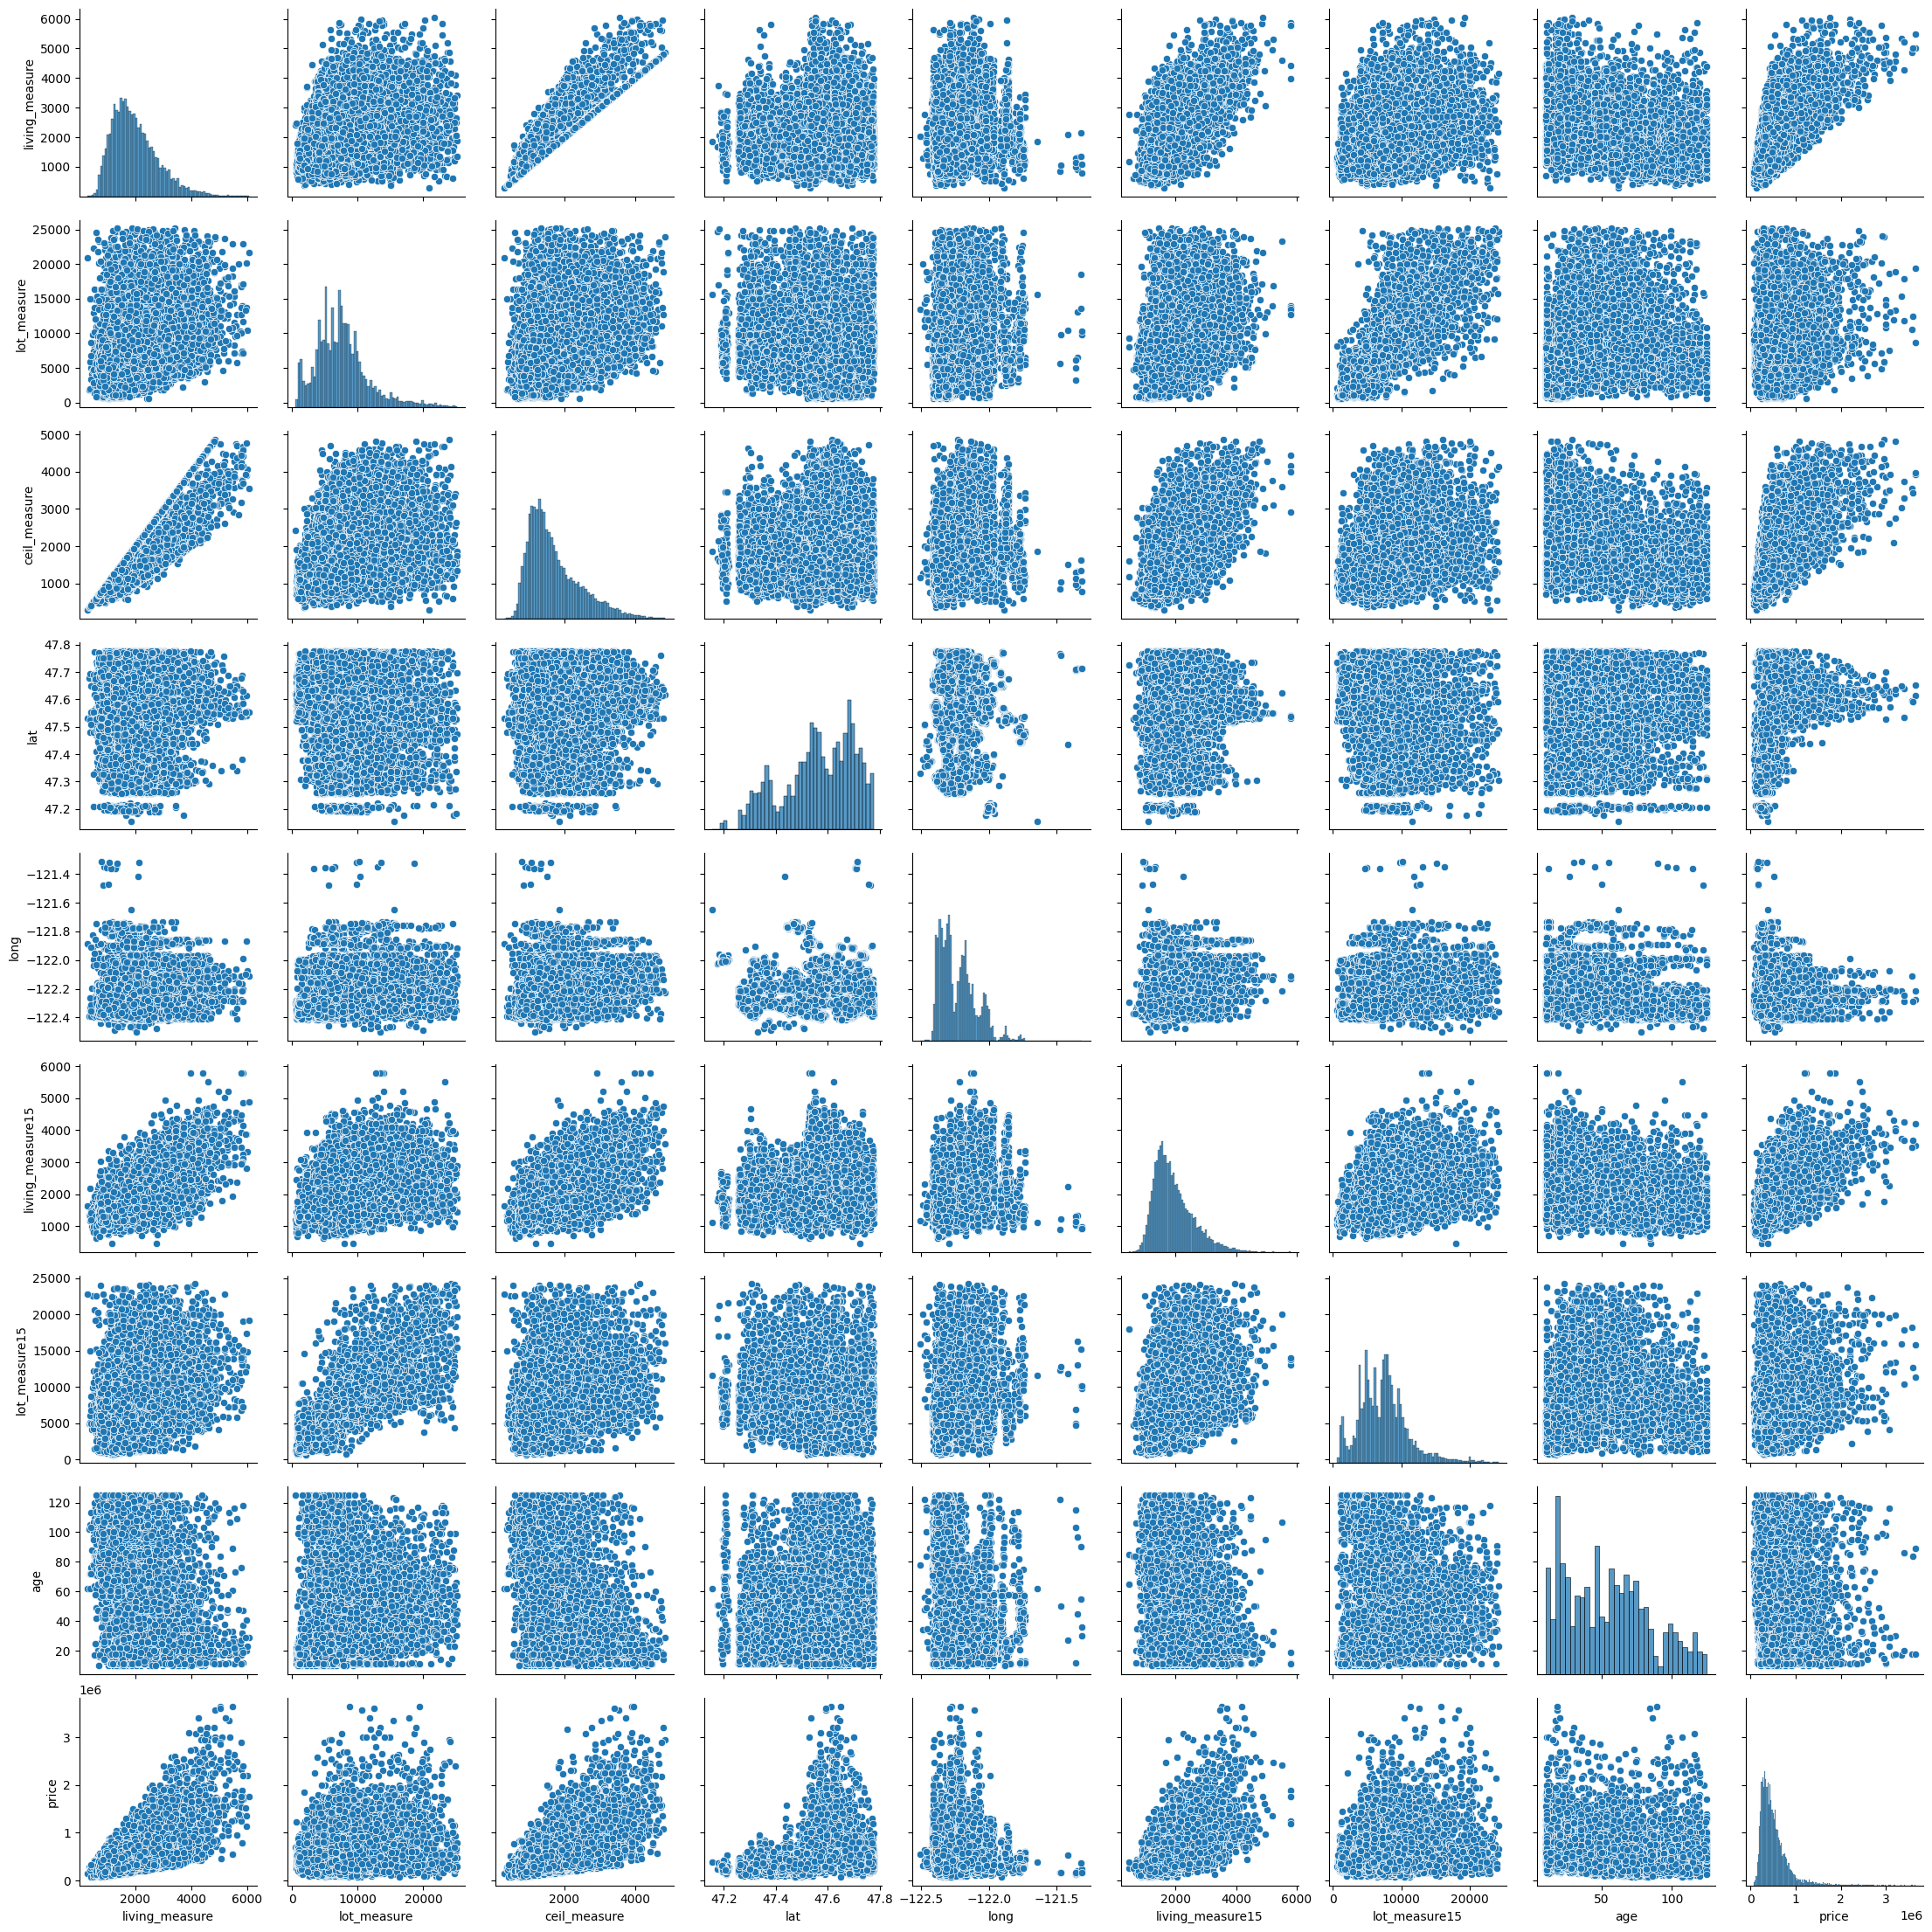

In [ ]:
import seaborn as sns

# Selecting specific columns
columns_to_plot = continous_features + ["price"]

# Creating the pairplot
sns.pairplot(df_processed[columns_to_plot])

In [ ]:
## Correlation
correlation_matrix = df_processed.corr()
correlation_matrix

price  room_bed  room_bath  living_measure  \
price                   1.000000  0.309037   0.488859        0.671719   
room_bed                0.309037  1.000000   0.521198        0.613466   
room_bath               0.488859  0.521198   1.000000        0.737473   
living_measure          0.671719  0.613466   0.737473        1.000000   
lot_measure             0.149630  0.206534   0.052310        0.284239   
ceil                    0.251825  0.166459   0.508482        0.347108   
coast                   0.230247 -0.003503   0.051277        0.080357   
sight                   0.404344  0.084516   0.175618        0.283916   
condition               0.054814  0.026733  -0.129468       -0.052461   
quality                 0.659135  0.355788   0.643279        0.738913   
ceil_measure            0.558106  0.503030   0.664233        0.856354   
lat                     0.340389 -0.026386   0.010478        0.043977   
long                   -0.000063  0.142197   0.224043        0.220315   
living_measure15        0.585989  0.406198   0.558093        0.759403   
lot_measure15           0.151706  0.186945   0.044400        0.266706   
furnished               0.580253  0.256285   0.457772        0.616546   
is_basement             0.206631  0.166960   0.169952        0.228710   
is_renovated            0.138017  0.022792   0.053360        0.060159   
age                    -0.026876 -0.157070  -0.515303       -0.313320   
location_code_4900      0.082864  0.099055   0.058177        0.101022   
location_code_4901     -0.090180  0.051221   0.088789        0.035778   
location_code_4902     -0.034129  0.066422   0.078932        0.083853   
location_code_4903      0.085110  0.072826   0.144256        0.186128   
location_code_4904     -0.077842  0.027217   0.027792        0.016095   
location_code_4905      0.139499 -0.120027  -0.093356       -0.132887   
location_code_4906     -0.046496 -0.101667  -0.116155       -0.128623   
location_code_4907     -0.059260 -0.037049  -0.085686       -0.075925   
location_code_4908     -0.093860 -0.026012  -0.104105       -0.052674   
location_code_4909     -0.008408 -0.026040  -0.032184       -0.020375   
sold_year_2014         -0.009149  0.007766   0.027952        0.025087   
sold_year_2015          0.009149 -0.007766  -0.027952       -0.025087   
sold_quarter_1         -0.023456 -0.002573  -0.011115       -0.013535   
sold_quarter_2          0.030225 -0.003584  -0.016394       -0.011753   
sold_quarter_3          0.014430  0.012772   0.027636        0.028610   
sold_quarter_4         -0.025439 -0.012026  -0.003881       -0.011929   
sold_quarter_5         -0.010089  0.006745  -0.000026        0.006178   
sold_weekday_Friday     0.004202  0.006487   0.010490        0.008101   
sold_weekday_Monday     0.002668 -0.010216  -0.011662       -0.007404   
sold_weekday_Saturday   0.003613 -0.005698  -0.002279       -0.008312   
sold_weekday_Sunday     0.004909 -0.002725   0.006529        0.004801   
sold_weekday_Thursday  -0.007747  0.008830   0.002881        0.001313   
sold_weekday_Tuesday   -0.001612 -0.003682  -0.003797       -0.004032   
sold_weekday_Wednesday  0.000329  0.001469   0.001650        0.003612   

                        lot_measure      ceil     coast     sight  condition  \
price                      0.149630  0.251825  0.230247  0.404344   0.054814   
room_bed                   0.206534  0.166459 -0.003503  0.084516   0.026733   
room_bath                  0.052310  0.508482  0.051277  0.175618  -0.129468   
living_measure             0.284239  0.347108  0.080357  0.283916  -0.052461   
lot_measure                1.000000 -0.278730  0.089116  0.140226   0.102977   
ceil                      -0.278730  1.000000  0.024056  0.024740  -0.270800   
coast                      0.089116  0.024056  1.000000  0.362835   0.014039   
sight                      0.140226  0.024740  0.362835  1.000000   0.045856   
condition                  0.102977 -0.270800  0.014039  0.045856   1.000000   
quality       

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df, feature_set, cmap='coolwarm', figsize=(8, 6)):
    """
    Computes correlation matrix and plots the heatmap for the given DataFrame and feature set.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - feature_set (list): List of columns to compute correlation for.
    - cmap (str): Colormap for the heatmap (default: 'coolwarm').
    - figsize (tuple): Size of the figure (default: (8, 6)).

    Returns:
    - None (Displays heatmap)
    """
    # Ensure feature set is in the DataFrame
    selected_features = [col for col in feature_set if col in df.columns]

    if not selected_features:
        raise ValueError("No valid features found in DataFrame.")

    # Compute correlation matrix
    correlation_matrix = df[selected_features].corr()

    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, center=0)
    plt.title("Feature Correlation Heatmap")
    plt.show()


# Feature Engineering Part 2

## Feature selection on basis of correlation

Feature Selection Rules:</br>


1.   Correlation between feature and target value should be greater than 0.05 or less than -0.05, such that our feature should have some impact on the target (price)
2.   Inter-feature correlation should be less than 0.85, if two features violate this rule one will be discarded.



In [ ]:
continous_features

['living_measure',
 'lot_measure',
 'ceil_measure',
 'lat',
 'long',
 'living_measure15',
 'lot_measure15',
 'age']

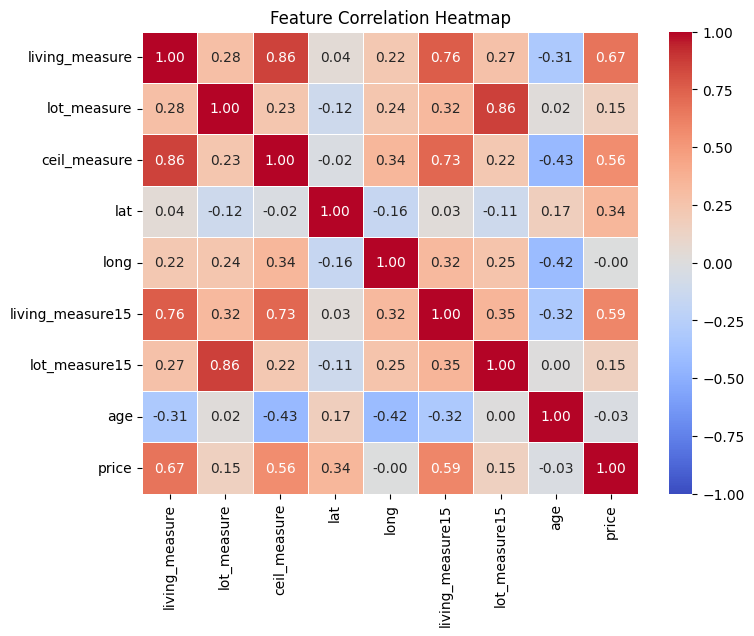

In [ ]:
plot_correlation_heatmap(df=df_processed, feature_set=continous_features + ["price"])

On the basis of the above heatmap we can easily discard some of the features:</br>


*   long
*   age
*   ceil_measure (highly correlated with lot_measure)



In [ ]:
filtered_continous_features = [
    'living_measure',
    'lot_measure',
    'lat',
    'living_measure15',
    'lot_measure15',
  ]

In [ ]:
discrete_features

['room_bed',
 'room_bath',
 'ceil',
 'coast',
 'sight',
 'condition',
 'quality',
 'furnished',
 'is_basement',
 'is_renovated',
 'location_code_4900',
 'location_code_4901',
 'location_code_4902',
 'location_code_4903',
 'location_code_4904',
 'location_code_4905',
 'location_code_4906',
 'location_code_4907',
 'location_code_4908',
 'location_code_4909',
 'sold_year_2014',
 'sold_year_2015',
 'sold_quarter_1',
 'sold_quarter_2',
 'sold_quarter_3',
 'sold_quarter_4',
 'sold_quarter_5',
 'sold_weekday_Friday',
 'sold_weekday_Monday',
 'sold_weekday_Saturday',
 'sold_weekday_Sunday',
 'sold_weekday_Thursday',
 'sold_weekday_Tuesday',
 'sold_weekday_Wednesday']

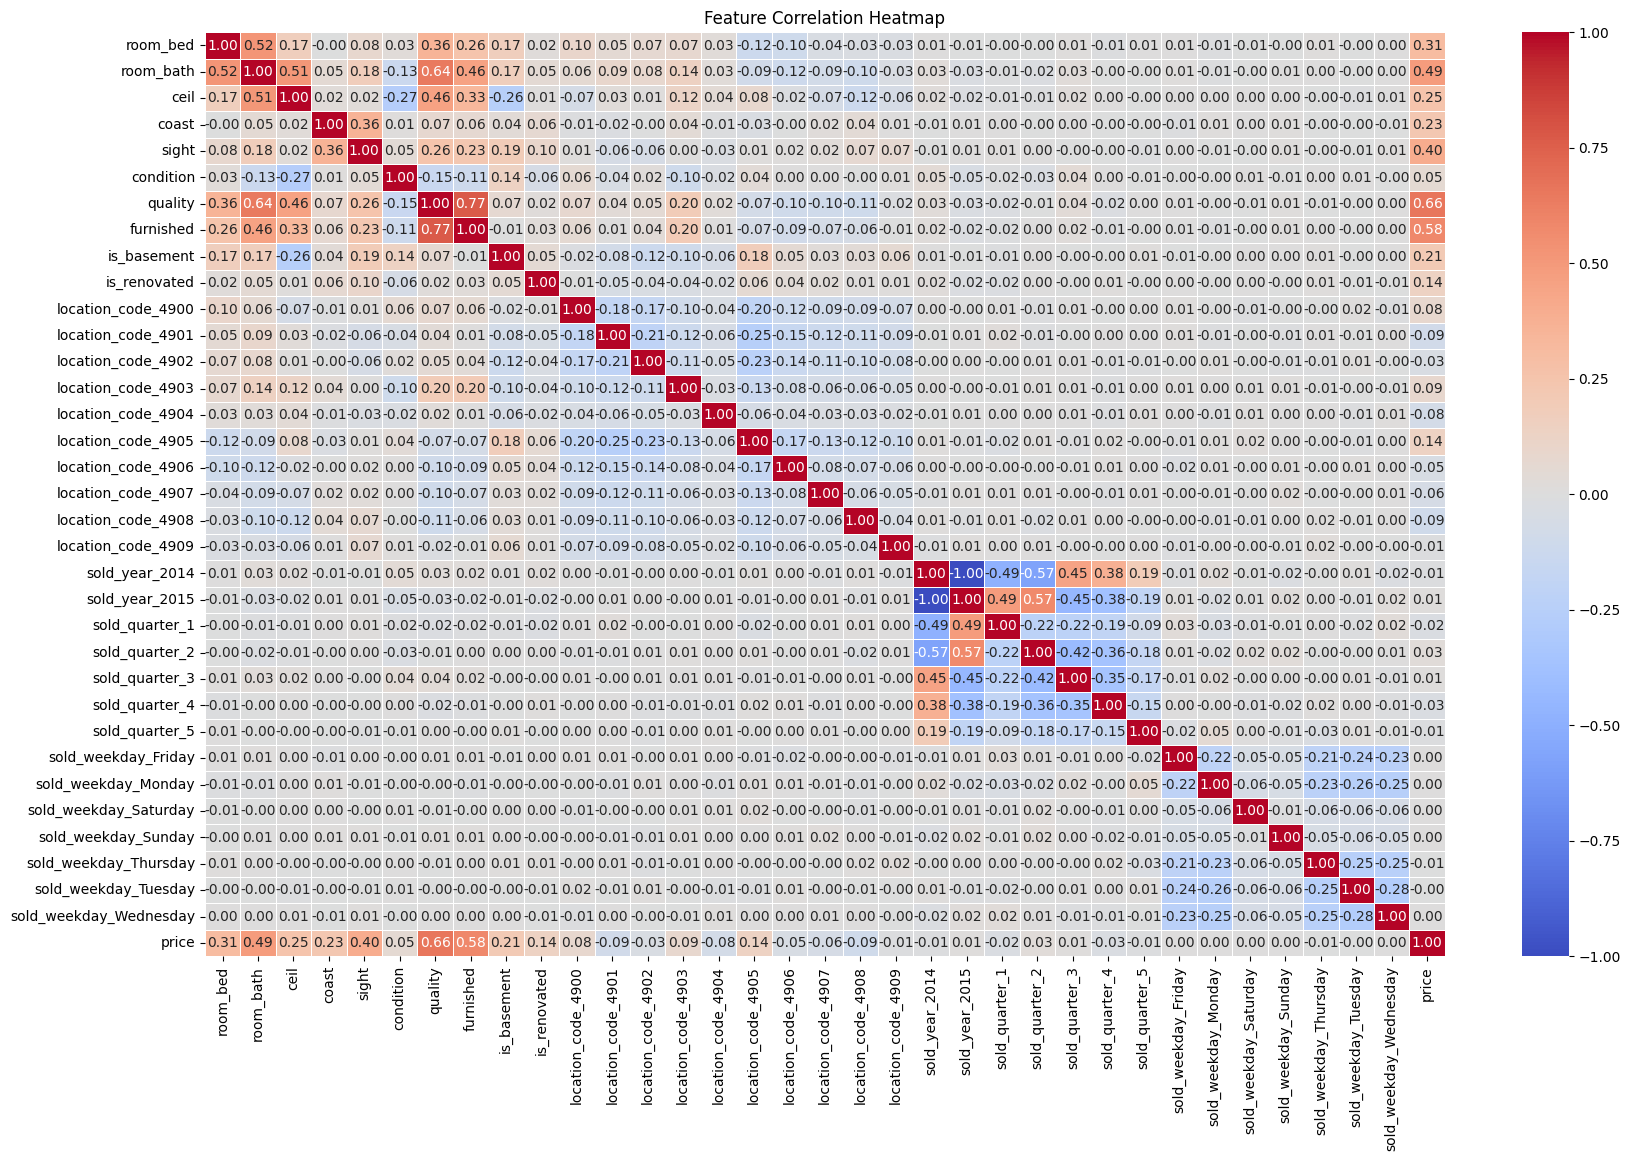

In [ ]:
plot_correlation_heatmap(df=df_processed, feature_set=discrete_features+["price"], figsize=(20, 12))

In [ ]:
for ele in correlation_matrix["price"]:
  print(ele)

1.0
0.3090369934389161
0.488859282499161
0.6717194580742913
0.1496303799627176
0.25182466462538966
0.23024749621121193
0.4043435749496108
0.0548135781148899
0.6591345953880376
0.5581062786036214
0.34038947822210613
-6.329856863725563e-05
0.5859892910341149
0.15170642288928501
0.5802528082232573
0.20663052212948543
0.13801654090661716
-0.0268762809028816
0.08286375645396038
-0.09018034877340228
-0.03412938905621721
0.08510955570593515
-0.07784243872419255
0.1394987993739008
-0.04649614782261787
-0.05925965948755662
-0.09386004941671201
-0.008408402937192845
-0.009148570844334326
0.00914857084433427
-0.02345579946613225
0.030225270030585862
0.014430278612196286
-0.025438966509785648
-0.010088683276336148
0.004202396477007481
0.0026675363204758593
0.003613363731308502
0.004908531039397528
-0.007746802832225232
-0.0016120151829400091
0.0003288112683078488


In [ ]:
type(correlation_matrix["price"])

pandas.core.series.Series

In [ ]:
correlation_matrix["price"]

price                     1.000000
room_bed                  0.309037
room_bath                 0.488859
living_measure            0.671719
lot_measure               0.149630
ceil                      0.251825
coast                     0.230247
sight                     0.404344
condition                 0.054814
quality                   0.659135
ceil_measure              0.558106
lat                       0.340389
long                     -0.000063
living_measure15          0.585989
lot_measure15             0.151706
furnished                 0.580253
is_basement               0.206631
is_renovated              0.138017
age                      -0.026876
location_code_4900        0.082864
location_code_4901       -0.090180
location_code_4902       -0.034129
location_code_4903        0.085110
location_code_4904       -0.077842
location_code_4905        0.139499
location_code_4906       -0.046496
location_code_4907       -0.059260
location_code_4908       -0.093860
location_code_4909       -0.008408
sold_year_2014           -0.009149
sold_year_2015            0.009149
sold_quarter_1           -0.023456
sold_quarter_2            0.030225
sold_quarter_3            0.014430
sold_quarter_4           -0.025439
sold_quarter_5           -0.010089
sold_weekday_Friday       0.004202
sold_weekday_Monday       0.002668
sold_weekday_Saturday     0.003613
sold_weekday_Sunday       0.004909
sold_weekday_Thursday    -0.007747
sold_weekday_Tuesday     -0.001612
sold_weekday_Wednesday    0.000329
Name: price, dtype: float64

In [ ]:
correlation_matrix["price"].index[0]

'price'

In [ ]:
correlation_matrix["price"].iloc[0]

np.float64(1.0)

In [ ]:
len(correlation_matrix["price"])

43

In [ ]:
correlation_matrix.shape[0]

43

In [ ]:
filtered_discrete_features = []
for i in range(len(correlation_matrix["price"])):
  index_name = correlation_matrix["price"].index[i]
  ele_value = correlation_matrix["price"].iloc[i]
  if index_name in discrete_features and (ele_value > 0.05 or ele_value < -0.05):
    filtered_discrete_features.append(index_name)
filtered_discrete_features

['room_bed',
 'room_bath',
 'ceil',
 'coast',
 'sight',
 'condition',
 'quality',
 'furnished',
 'is_basement',
 'is_renovated',
 'location_code_4900',
 'location_code_4901',
 'location_code_4903',
 'location_code_4904',
 'location_code_4905',
 'location_code_4907',
 'location_code_4908']

In [ ]:
filtered_features = filtered_continous_features + filtered_discrete_features
filtered_features

['living_measure',
 'lot_measure',
 'lat',
 'living_measure15',
 'lot_measure15',
 'room_bed',
 'room_bath',
 'ceil',
 'coast',
 'sight',
 'condition',
 'quality',
 'furnished',
 'is_basement',
 'is_renovated',
 'location_code_4900',
 'location_code_4901',
 'location_code_4903',
 'location_code_4904',
 'location_code_4905',
 'location_code_4907',
 'location_code_4908']

In [ ]:
filtered_df = df_processed[filtered_features + ["price"]]
filtered_df

living_measure  lot_measure      lat  living_measure15  lot_measure15  \
0              3050.0       9440.0  47.7228            2020.0         8660.0   
1               670.0       3101.0  47.5546            1660.0         4100.0   
2              3040.0       2415.0  47.5188            2620.0         2433.0   
3              1740.0       3721.0  47.3363            2030.0         3794.0   
4              1120.0       4590.0  47.5663            1120.0         5100.0   
...               ...          ...      ...               ...            ...   
21606          2040.0      14071.0  47.7278            1890.0        14040.0   
21607          1730.0       6900.0  47.3915            1950.0         7200.0   
21609          1030.0       4841.0  47.6860            1530.0         4944.0   
21611          1560.0       7800.0  47.5140            1160.0         7800.0   
21612          1940.0       4875.0  47.6427            1790.0         4875.0   

       room_bed  room_bath  ceil  coast  sight  condition  quality  furnished  \
0             4       1.75   1.0      0      0          3        8          0   
1             2       1.00   1.0      0      0          4        6          0   
2             4       2.75   2.0      1      4          3        8          0   
3             3       2.50   2.0      0      0          3        8          0   
4             2       1.00   1.0      0      0          3        7          0   
...         ...        ...   ...    ...    ...        ...      ...        ...   
21606         3       2.50   2.0      0      0          3        7          0   
21607         3       1.75   1.0      0      0          4        7          0   
21609         2       1.00   1.0      0      0          3        7          0   
21611         4       2.50   2.0      0      0          3        7          0   
21612         4       2.50   2.0      0      0          4        9          1   

       is_basement  is_renovated  location_code_4900  location_code_4901  \
0                1             0                   0                   1   
1                0             0                   0                   0   
2                0             0                   0                   0   
3                0             0                   1                   0   
4                0             0                   0                   0   
...            ...           ...                 ...                 ...   
21606            0             0                   1                   0   
21607            1             0                   0                   1   
21609            1             0                   0                   0   
21611            0             0                   0                   0   
21612            0             0                   0                   0   

       location_code_4903  location_code_4904  location_code_4905  \
0                       0                   0                   0   
1                       0                   0                   1   
2                       0                   0                   1   
3                       0                   0                   0   
4                       0                   0                   1   
...                   ...                 ...                 ...   
21606                   0                   0                   0   
21607                   0                   0                   0   
21609                   0                   0                   1   
21611                   0                   0                   0   
21612                   0                   0                   1   

       location_code_4907  location_code_4908    price  
0                       0                   0   600000  
1                       0                   0   190000  
2                       0                   0   735000  
3                       0                   0   257000  
4                       0                   0 

# Model Training

In [ ]:
filtered_df.reset_index(drop=True, inplace=True)
filtered_df

living_measure  lot_measure      lat  living_measure15  lot_measure15  \
0              3050.0       9440.0  47.7228            2020.0         8660.0   
1               670.0       3101.0  47.5546            1660.0         4100.0   
2              3040.0       2415.0  47.5188            2620.0         2433.0   
3              1740.0       3721.0  47.3363            2030.0         3794.0   
4              1120.0       4590.0  47.5663            1120.0         5100.0   
...               ...          ...      ...               ...            ...   
19263          2040.0      14071.0  47.7278            1890.0        14040.0   
19264          1730.0       6900.0  47.3915            1950.0         7200.0   
19265          1030.0       4841.0  47.6860            1530.0         4944.0   
19266          1560.0       7800.0  47.5140            1160.0         7800.0   
19267          1940.0       4875.0  47.6427            1790.0         4875.0   

       room_bed  room_bath  ceil  coast  sight  condition  quality  furnished  \
0             4       1.75   1.0      0      0          3        8          0   
1             2       1.00   1.0      0      0          4        6          0   
2             4       2.75   2.0      1      4          3        8          0   
3             3       2.50   2.0      0      0          3        8          0   
4             2       1.00   1.0      0      0          3        7          0   
...         ...        ...   ...    ...    ...        ...      ...        ...   
19263         3       2.50   2.0      0      0          3        7          0   
19264         3       1.75   1.0      0      0          4        7          0   
19265         2       1.00   1.0      0      0          3        7          0   
19266         4       2.50   2.0      0      0          3        7          0   
19267         4       2.50   2.0      0      0          4        9          1   

       is_basement  is_renovated  location_code_4900  location_code_4901  \
0                1             0                   0                   1   
1                0             0                   0                   0   
2                0             0                   0                   0   
3                0             0                   1                   0   
4                0             0                   0                   0   
...            ...           ...                 ...                 ...   
19263            0             0                   1                   0   
19264            1             0                   0                   1   
19265            1             0                   0                   0   
19266            0             0                   0                   0   
19267            0             0                   0                   0   

       location_code_4903  location_code_4904  location_code_4905  \
0                       0                   0                   0   
1                       0                   0                   1   
2                       0                   0                   1   
3                       0                   0                   0   
4                       0                   0                   1   
...                   ...                 ...                 ...   
19263                   0                   0                   0   
19264                   0                   0                   0   
19265                   0                   0                   1   
19266                   0                   0                   0   
19267                   0                   0                   1   

       location_code_4907  location_code_4908    price  
0                       0                   0   600000  
1                       0                   0   190000  
2                       0                   0   735000  
3                       0                   0   257000  
4                       0                   0 

## Standard Scalarization

In [ ]:
X = filtered_df.drop(columns=["price"]) ## Input Features
y = filtered_df["price"] ## Target Variable

from sklearn.preprocessing import StandardScaler
## Scikit-Learn: For performing various machine learning techniques

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Scaling
x_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x_standardized

living_measure  lot_measure       lat  living_measure15  lot_measure15  \
0            1.276434     0.427052  1.176677          0.144674       0.328341   
1           -1.615444    -1.104801 -0.058485         -0.414345      -0.917756   
2            1.264283    -1.270576 -0.321379          1.076371      -1.373292   
3           -0.315314    -0.954974 -1.661551          0.160202      -1.001376   
4           -1.068660    -0.744976  0.027433         -1.252872      -0.644489   
...               ...          ...       ...               ...            ...   
19263        0.049209     1.546157  1.213394         -0.057194       1.798518   
19264       -0.327464    -0.186753 -1.256195          0.035976      -0.070628   
19265       -1.178017    -0.684321  0.906439         -0.616212      -0.687119   
19266       -0.534027     0.030737 -0.356627         -1.190759       0.093332   
19267       -0.072299    -0.676104  0.588470         -0.212477      -0.705974   

       room_bed  room_bath      ceil      coast     sight  condition  \
0      0.718423  -0.443394 -0.899860  -0.071499 -0.294473  -0.631864   
1     -1.493558  -1.455876 -0.899860  -0.071499 -0.294473   0.899551   
2      0.718423   0.906581  0.935874  13.986145  5.200834  -0.631864   
3     -0.387567   0.569087  0.935874  -0.071499 -0.294473  -0.631864   
4     -1.493558  -1.455876 -0.899860  -0.071499 -0.294473  -0.631864   
...         ...        ...       ...        ...       ...        ...   
19263 -0.387567   0.569087  0.935874  -0.071499 -0.294473  -0.631864   
19264 -0.387567  -0.443394 -0.899860  -0.071499 -0.294473   0.899551   
19265 -1.493558  -1.455876 -0.899860  -0.071499 -0.294473  -0.631864   
19266  0.718423   0.569087  0.935874  -0.071499 -0.294473  -0.631864   
19267  0.718423   0.569087  0.935874  -0.071499 -0.294473   0.899551   

        quality  furnished  is_basement  is_renovated  location_code_4900  \
0      0.383057  -0.456181     1.228487     -0.204163           -0.385150   
1     -1.440701  -0.456181    -0.814009     -0.204163           -0.385150   
2      0.383057  -0.456181    -0.814009     -0.204163           -0.385150   
3      0.383057  -0.456181    -0.814009     -0.204163            2.596394   
4     -0.528822  -0.456181    -0.814009     -0.204163           -0.385150   
...         ...        ...          ...           ...                 ...   
19263 -0.528822  -0.456181    -0.814009     -0.204163            2.596394   
19264 -0.528822  -0.456181     1.228487     -0.204163           -0.385150   
19265 -0.528822  -0.456181     1.228487     -0.204163           -0.385150   
19266 -0.528822  -0.456181    -0.814009     -0.204163           -0.385150   
19267  1.294937   2.192114    -0.814009     -0.204163           -0.385150   

       location_code_4901  location_code_4903  location_code_4904  \
0                2.099477            -0.25426            -0.11604   
1               -0.476309            -0.25426            -0.11604   
2               -0.476309            -0.25426            -0.11604   
3               -0.476309            -0.25426            -0.11604   
4               -0.476309            -0.25426            -0.11604   
...                   ...                 ...                 ...   
19263           -0.476309            -0.25426            -0.11604   
19264            2.099477            -0.25426            -0.11604   
19265           -0.476309            -0.25426            -0.11604   
19266           -0.476309            -0.25426            -0.11604   
19267           -0.476309            -0.25426            -0.11604   

       location_code_4905  location_code_4907  location_code_4908  
0               -0.525784            -0.24618           -0.228235  
1                1.901921            -0.24618           -0.228235  
2                1.901921            -0.24618           -0.228235  
3               -0.525784            -0.24618           -0.228235  
4                1.901921            -0.24618           -0.228235  
...    

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split Data into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.2, random_state=42)

## Model Training

In [ ]:
def visualize_model_results(y_test, y_pred):
  import matplotlib.pyplot as plt
  from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
  import numpy as np

  # Evaluate Model Performance
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  # Print Results
  print(f"Root Mean Squared Error (RMSE): {rmse}")
  print(f"R² Score: {r2}")

  # Calculate Mean Absolute Percentage Error (MAPE)
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
  print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

  # Visualizing Predictions vs Actual Values
  plt.scatter(y_test, y_pred, color='blue', label='Predictions')
  plt.plot(y_test, y_test, color='red', linestyle='dashed', label='Perfect Fit')
  plt.xlabel("Actual Prices")
  plt.ylabel("Predicted Prices")
  plt.title("Actual vs Predicted Prices")
  plt.legend()
  plt.show()

### Linear Regression

Root Mean Squared Error (RMSE): 184351.9536975691
R² Score: 0.7018617330922157
Mean Absolute Percentage Error (MAPE): 23.77%


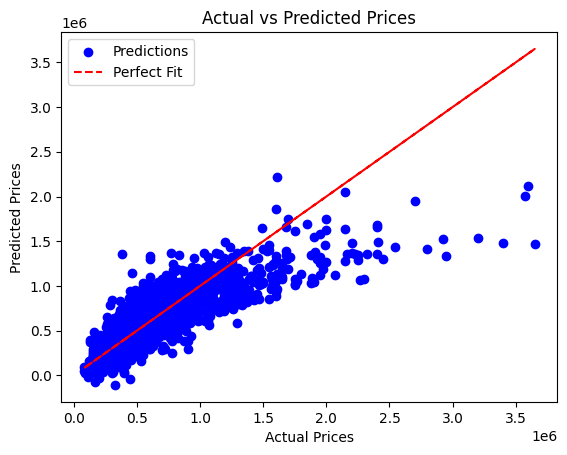

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

visualize_model_results(y_test, y_pred)

In [ ]:
model

LinearRegression()

In [ ]:
# Get coefficients & intercept
coefficients = model.coef_
intercept = model.intercept_

# Print them
print("Intercept (b):", intercept)
print("Coefficients (w):", coefficients)


Intercept (b): 519421.9136240617
Coefficients (w): [121095.41741044  -1284.74708814  80702.25825894  33535.07416872
   4819.61793067 -17231.91591839   2313.63761966  -9339.40689228
  38830.18365636  42137.615649    34082.99069518  69470.84816423
  35061.9314003   -6195.67126303  23973.77853595  15646.50215815
  -4610.27007217 -20948.99983147  -6213.63648228  51619.31092631
  -4239.57468802 -10182.55134139]


### Ridge Regression

Root Mean Squared Error (RMSE): 184352.41729009763
R² Score: 0.7018602336250928
Mean Absolute Percentage Error (MAPE): 23.77%


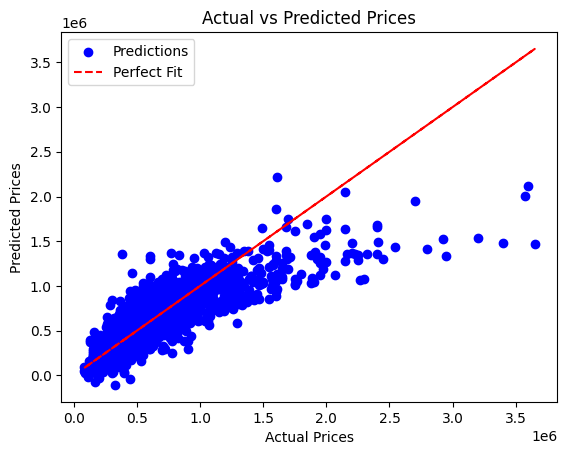

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression


# Ridge Regression
ridge = Ridge(alpha=1)  # Alpha is the regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

visualize_model_results(y_test, y_pred_ridge)


### Lasso Regression

Root Mean Squared Error (RMSE): 184352.15394479074
R² Score: 0.7018610854029359
Mean Absolute Percentage Error (MAPE): 23.77%


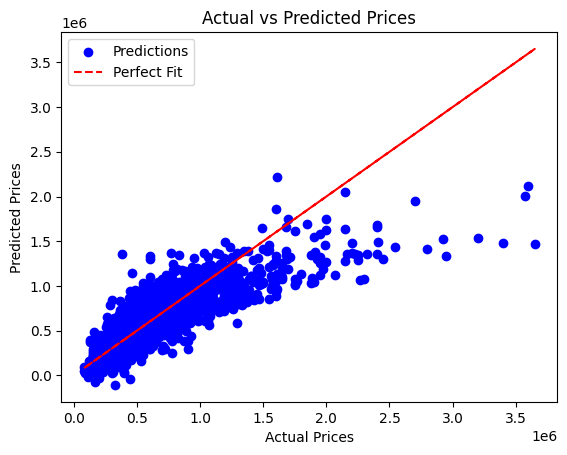

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

visualize_model_results(y_test, y_pred_lasso)

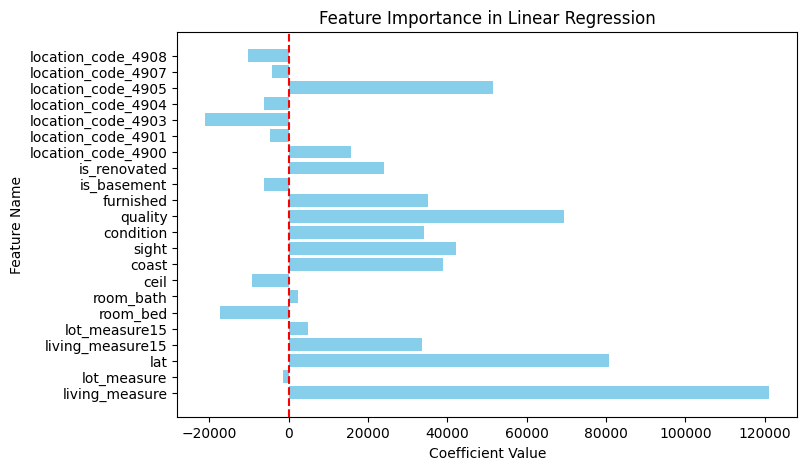

In [ ]:
import matplotlib.pyplot as plt

# Feature names (if you have them)
feature_names = X_train.columns  # Assuming X is a Pandas DataFrame

# Plot coefficients
plt.figure(figsize=(8, 5))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Linear Regression")
plt.axvline(0, color='red', linestyle="--")  # Vertical line at zero
plt.show()


### Polynomial Regression

Root Mean Squared Error (RMSE): 148459.12157800182
R² Score: 0.8066536371614423
Mean Absolute Percentage Error (MAPE): 18.82%


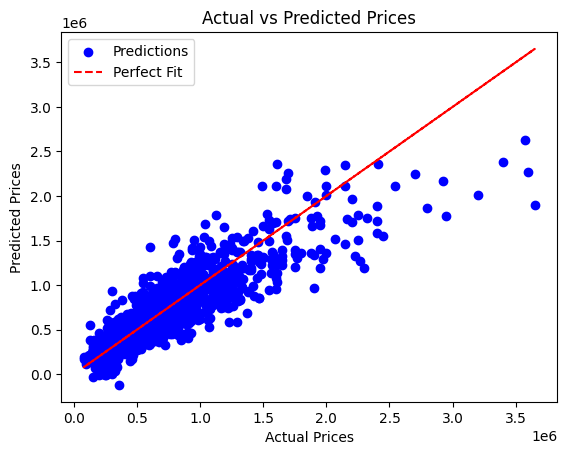

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create Polynomial Features (Degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test)

# Evaluate
visualize_model_results(y_test, y_pred_poly)


### SVR (Support Vector Regressor)

Root Mean Squared Error (RMSE): 349240.79585715
R² Score: -0.06997140689286119
Mean Absolute Percentage Error (MAPE): 41.29%


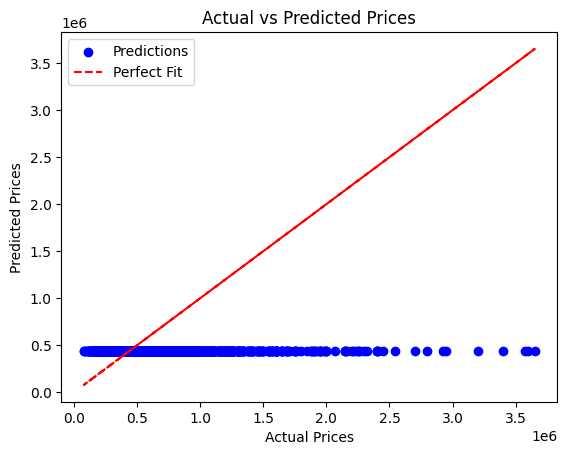

In [ ]:
from sklearn.svm import SVR

# Create Polynomial Features (Degree 2)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predictions
y_pred_svr = svr.predict(X_test)

# Evaluate
visualize_model_results(y_test, y_pred_svr)


#### Given a Bad result for SVR won't consider it

### Decision Tree Regressor

Root Mean Squared Error (RMSE): 175048.11242154412
R² Score: 0.7311951516349443
Mean Absolute Percentage Error (MAPE): 18.86%


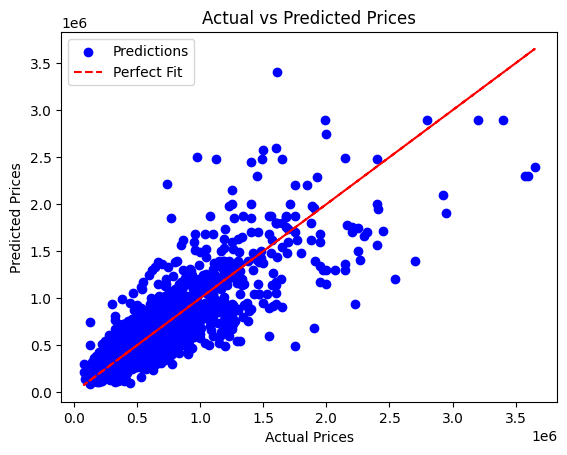

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
tree_regressor.fit(X_train, y_train)

# Predictions
y_pred_tr = tree_regressor.predict(X_test)

# Evaluate
visualize_model_results(y_test, y_pred_tr)

### Random Forest

Root Mean Squared Error (RMSE): 132451.5822632961
R² Score: 0.8461007387611341
Mean Absolute Percentage Error (MAPE): 15.10%


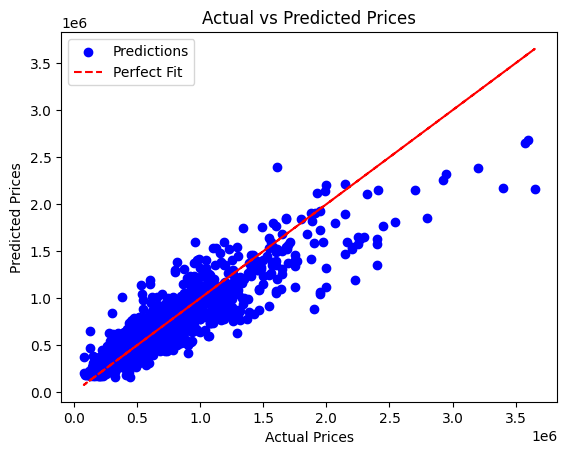

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train) # train

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
visualize_model_results(y_test, y_pred_rf)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 15}
Root Mean Squared Error (RMSE): 126699.92087437201
R² Score: 0.8591765690793539
Mean Absolute Percentage Error (MAPE): 14.22%


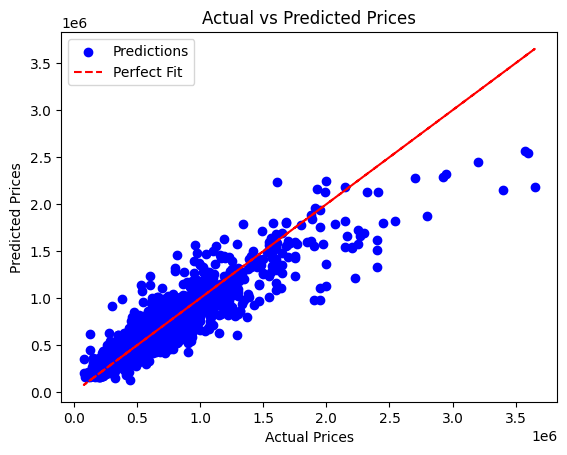

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid (moderate number of choices)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV for faster tuning (cv=3 for 3-fold cross-validation)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)

# Fit the model (this will take some time)
random_search.fit(X_train, y_train)

# Print best parameters found
print("Best Hyperparameters:", random_search.best_params_)

# Use best model for prediction
best_rf_model = random_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
visualize_model_results(y_test, y_pred_rf_tuned)

Root Mean Squared Error (RMSE): 123077.98217390469
R² Score: 0.8671128749847412
Mean Absolute Percentage Error (MAPE): 14.12%


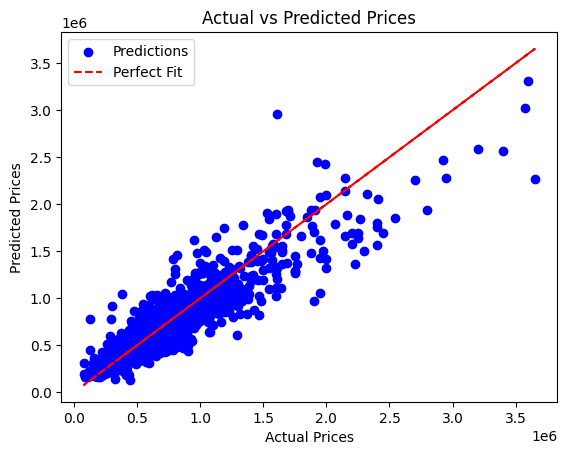

In [ ]:
from xgboost import XGBRegressor #Ensemple Techniques

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
visualize_model_results(y_test, y_pred_xgb)


### XGBRegressor with GridSearchCV

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8}
Root Mean Squared Error (RMSE): 115516.41434878422
R² Score: 0.8829396963119507
Mean Absolute Percentage Error (MAPE): 13.40%


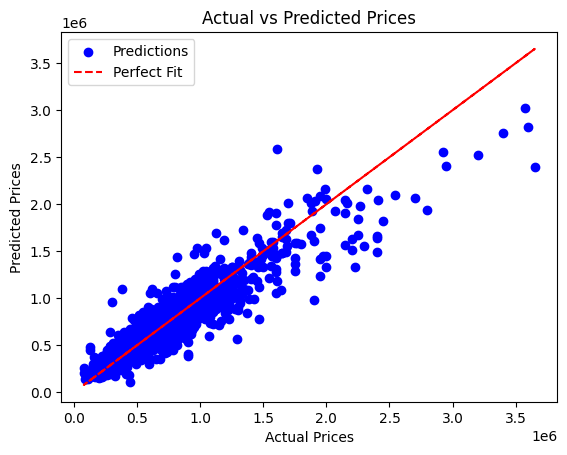

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'max_depth': [3, 5, 7],  # Depth of trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of weights required in a child node
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features used per tree
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, scoring='r2', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Print best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the tuned model
visualize_model_results(y_test, y_pred_xgb)

### LGBMRegressor with RandomizedSearchCV

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 15414, number of used features: 22
[LightGBM] [Info] Start training from score 517794.588556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

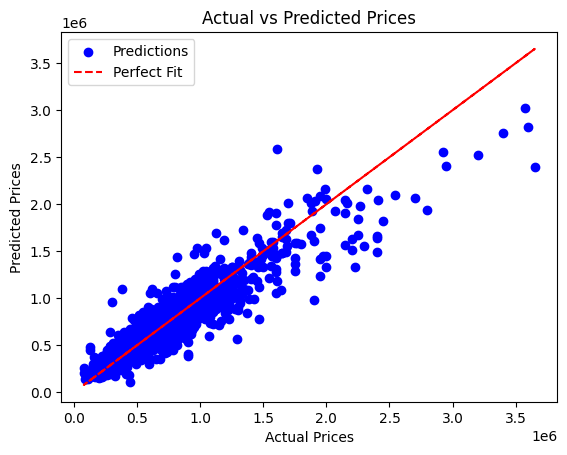

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Define LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Define parameter grid for tuning
param_dist = {
    'num_leaves': [20, 31, 40],  # Tree complexity
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'n_estimators': [100, 300, 500],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Depth of trees
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features used per tree
}

# Perform Randomized Search CV for efficient tuning
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Limits the number of trials for efficiency
    scoring='r2',
    cv=3,  # 3-Fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model from tuning
best_lgb = random_search.best_estimator_

# Print best parameters found
print("Best Hyperparameters:", random_search.best_params_)

# Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the tuned model
visualize_model_results(y_test, y_pred_xgb)


### Deep Learning

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 346994638848.0000 - val_loss: 83381084160.0000 - learning_rate: 0.0010
Epoch 2/300
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 60036911104.0000 - val_loss: 41454419968.0000 - learning_rate: 0.0010
Epoch 3/300
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 38651432960.0000 - val_loss: 34040543232.0000 - learning_rate: 0.0010
Epoch 4/300
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 33743116288.0000 - val_loss: 30707388416.0000 - learning_rate: 0.0010
Epoch 5/300
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 30581770240.0000 - val_loss: 29115557888.0000 - learning_rate: 0.0010
Epoch 6/300
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 29644843008.0000 - val_loss: 28353075200.0000 - learning_rate: 0.0010
Epoch 7/300
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 27904083968.0000 - val_loss: 27511095296.0000 - learning_rate: 0.0010
Epoch 8/300
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 27188074496.0000 - val_loss: 2710

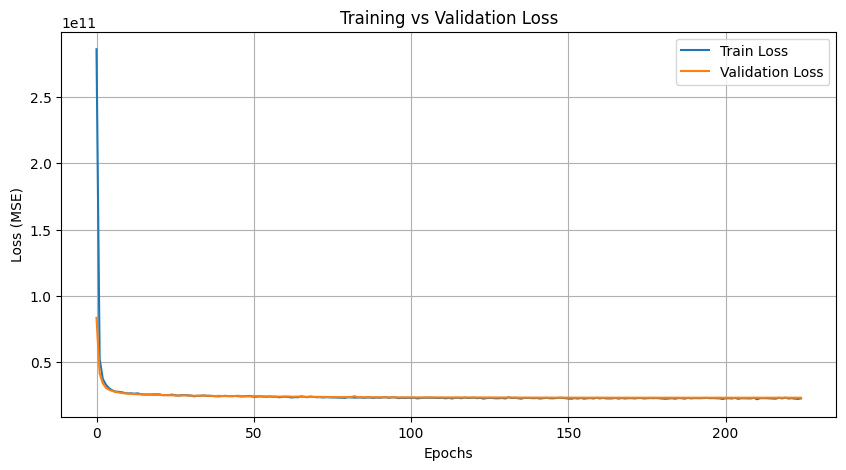

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Root Mean Squared Error (RMSE): 157448.72170964107
R² Score: 0.7825294137001038
Mean Absolute Percentage Error (MAPE): 18.28%


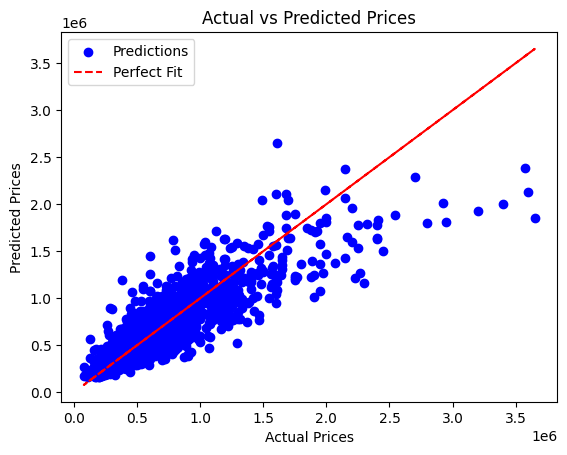

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -------------------------------
# 1. Build the Model
# -------------------------------
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# -------------------------------
# 2. Callbacks
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# -------------------------------
# 3. Train the Model
# -------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# -------------------------------
# 5. Plot Training vs Validation Loss
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 6. Predict and Inverse Scale
# -------------------------------
y_pred_deep_2 = model.predict(X_test)

# -------------------------------
# 7. Evaluation
# -------------------------------
visualize_model_results(y_test, y_pred_deep_2.reshape(-1))
